# Install required Libs

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Read Loans csv file and check the top 5 rows

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)
df.shape

(39717, 111)

# Data Understanding

## Analyze columns

### Get an overview of the columns in the dataset and their data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
data_dict_cols = ['annual_inc', 'annual_inc_joint', 'home_ownership', 'emp_length', 'dti', 'dti_joint', 'fico_range_high', 'fico_range_low', 'verification_status', 'verified_status_joint', 'emp_title', 'purpose', 'inq_last_12m', 'inq_last_6mths', 'addr_state', 'zip_code', 'title', 'application_type', 'loan_amnt', 'int_rate', 'term', 'installment', 'grade', 'sub_grade', 'loan_status', 'policy_code', 'delinq_2yrs', 'delinq_amnt', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'mths_since_last_delinq', 'pub_rec_bankruptcies', 'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'acc_now_delinq', 'revol_util', 'open_acc', 'total_acc', 'avg_cur_bal', 'total_bal_ex_mort', 'bc_util', 'tot_cur_bal']

In [6]:
pd.options.display.max_rows = 5000
pd.options.display.max_seq_items = 2000

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

### Difference between data dictionary columns and columns of the dataset

In [8]:
difference = list(set(data_dict_cols) - set(df.columns))

In [9]:
difference

['fico_range_low', 'fico_range_high', 'verified_status_joint']

### Create a subset of the data with the required columns as not all columns are required

In [10]:
required_cols_for_analysis = ['loan_amnt', 'issue_d', 'term', 'loan_status', 'installment', 'out_prncp', 'out_prncp_inv', 'int_rate', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'grade', 'sub_grade', 'annual_inc', 'dti', 'annual_inc_joint', 'dti_joint', 'revol_bal', 'revol_util', 'open_acc', 'total_acc', 'emp_length', 'home_ownership', 'zip_code', 'addr_state', 'delinq_2yrs', 'mths_since_last_delinq', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec', 'pub_rec_bankruptcies', 'delinq_amnt', 'bc_util', 'avg_cur_bal', 'total_bal_ex_mort', 'total_bc_limit', 'all_util', 'purpose', 'verification_status', 'verification_status_joint', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'inq_last_6mths', 'inq_last_12m', 'acc_open_past_24mths', 'tot_coll_amt', 'policy_code', 'tot_hi_cred_lim']

In [11]:
subset = df[required_cols_for_analysis]

### Analyze columns with dtype=object

In [12]:
subset.select_dtypes(include=['object']).columns

Index(['issue_d', 'term', 'loan_status', 'int_rate', 'grade', 'sub_grade',
       'revol_util', 'emp_length', 'home_ownership', 'zip_code', 'addr_state',
       'purpose', 'verification_status', 'last_pymnt_d'],
      dtype='object')

In [13]:
subset.issue_d.value_counts().head()

issue_d
Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Name: count, dtype: int64

In [14]:
subset.int_rate.value_counts().head()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
Name: count, dtype: int64

In [15]:
subset.grade.value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [16]:
subset.sub_grade.value_counts().head()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
Name: count, dtype: int64

In [17]:
subset.revol_util.value_counts().head()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
0.10%      58
Name: count, dtype: int64

In [18]:
subset.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [19]:
subset.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [20]:
subset.addr_state.value_counts().head()

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
Name: count, dtype: int64

In [21]:
subset.purpose.value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [22]:
subset.verification_status.value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [23]:
subset.last_pymnt_d.value_counts().head()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Name: count, dtype: int64

In [24]:
subset.zip_code.value_counts().head()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
Name: count, dtype: int64

In [25]:
subset.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [26]:
subset.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

> **Notes:**
> 1) Columns `int_rate`, `revol_util`, has a %, need to get rid of it.
> 2) The column `last_pymnt_d` and `issue_d` needs to be converted to `datatime` format.
> 3) The trailing xx in `zip_code` column need to be removed
> 4) Remove year/years from `emp_length`column

# Clean the data

Notes:

1. Columns with 39717 NA values can be removed as they are same as count of rows in the data
2. Columns `int_rate`, `revol_util`, have a %, need to get rid of it and convert these columns in floats.
3. The columns `last_pymnt_d` & `issue_d` need to be converted to datatime format.
4. The trailing xx in `zip_code` column need to be removed
5. The column `emp_length` needs to be converted to a numerical format by removing trailing year/years


## Drop columns with all null values

In [27]:
print(f'Initial Shape: {subset.shape}')
# Find the count of NaN values in each column
na_counts = subset.isna().sum()

# Identify columns with exactly 39717 NaN values
columns_to_drop = na_counts[na_counts == 39717].index

# Drop those columns from the DataFrame
subset = subset.drop(columns=columns_to_drop)

print("Columns dropped:", columns_to_drop.tolist())

print(f'Shape after dropping columns {subset.shape}')

Initial Shape: (39717, 51)
Columns dropped: ['annual_inc_joint', 'dti_joint', 'bc_util', 'avg_cur_bal', 'total_bal_ex_mort', 'total_bc_limit', 'all_util', 'verification_status_joint', 'inq_last_12m', 'acc_open_past_24mths', 'tot_coll_amt', 'tot_hi_cred_lim']
Shape after dropping columns (39717, 39)


## Remove % from `int_rate`

>Live with below error or set \
>`pd.options.mode.chained_assignment = None`  # default='warn' \
>https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [28]:
subset.int_rate = subset.int_rate.str.rstrip('%')
subset.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [29]:
subset.int_rate = pd.to_numeric(subset.int_rate)

In [30]:
subset.int_rate.dtype

dtype('float64')

## Remove % from `revol_util`

In [31]:
subset.revol_util = subset.revol_util.str.rstrip('%')
subset.revol_util.head()

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

In [32]:
subset.revol_util.dtype

dtype('O')

In [33]:
subset.revol_util = pd.to_numeric(subset.revol_util)

In [34]:
subset.revol_util.dtype

dtype('float64')

## Remove trailing `xx` from `zip_code`

In [35]:
subset.zip_code = subset.zip_code.str.rstrip('xx')
subset.zip_code.head()

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object

In [36]:
subset.zip_code.dtype

dtype('O')

In [37]:
subset.zip_code = pd.to_numeric(subset.zip_code)

In [38]:
subset.zip_code.dtype

dtype('int64')

## Convert `last_pymnt_d` in datetime

In [39]:
subset.last_pymnt_d = pd.to_datetime(subset.last_pymnt_d, format='%b-%y')
subset.last_pymnt_d.head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [40]:
subset.last_pymnt_d.dtype

dtype('<M8[ns]')

## Convert `issue_d` in datetime

In [41]:
subset.issue_d = pd.to_datetime(subset.issue_d, format='%b-%y')
subset.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [42]:
subset.issue_d.dtype

dtype('<M8[ns]')

## Convert `emp_length` in numerical format

1. Remove year/years
2. Treat 10+ as 10
3. Treat 0 to 1 as 0

In [43]:
subset.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [44]:
subset.emp_length = subset.emp_length.str.rstrip('years')
subset.emp_length = subset.emp_length.str.rstrip('year')

In [45]:
subset.emp_length = subset.emp_length.str.replace('10+', '10')
subset.emp_length = subset.emp_length.str.replace('< 1', '0')

In [46]:
subset.emp_length = pd.to_numeric(subset.emp_length).fillna(0).astype(int)

In [47]:
subset.emp_length.value_counts()

emp_length
10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

# Data Analysis

In [48]:
subset.head()

,loan_amnt,issue_d,term,loan_status,installment,out_prncp,out_prncp_inv,int_rate,total_pymnt,total_rec_prncp,...,delinq_amnt,purpose,verification_status,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,inq_last_6mths,policy_code
0,5000,2011-12-01,36 months,Fully Paid,162.87,0.00,0.00,10.65,5863.155187,5000.00,...,0,credit_card,Verified,0.00,0.00,0.00,2015-01-01,171.62,1,1
1,2500,2011-12-01,60 months,Charged Off,59.83,0.00,0.00,15.27,1008.710000,456.46,...,0,car,Source Verified,0.00,117.08,1.11,2013-04-01,119.66,5,1
2,2400,2011-12-01,36 months,Fully Paid,84.33,0.00,0.00,15.96,3005.666844,2400.00,...,0,small_business,Not Verified,0.00,0.00,0.00,2014-06-01,649.91,2,1
3,10000,2011-12-01,36 months,Fully Paid,339.31,0.00,0.00,13.49,12231.890000,10000.00,...,0,other,Source Verified,16.97,0.00,0.00,2015-01-01,357.48,1,1
4,3000,2011-12-01,60 months,Current,67.79,524.06,524.06,12.69,3513.330000,2475.94,...,0,other,Source Verified,0.00,0.00,0.00,2016-05-01,67.79,0,1


## Problem: Identify Driving Factors behind loan default

Goals -

1) Identify patterns in consumer and loan attributes that indicate a higher likelihood of loan default.
2) Analyze the factors influencing loan default to minimize credit loss for the lending company.
3) Evaluate the variables strongly associated with loan default to enhance the company’s portfolio and risk assessment strategies.
4) Use EDA techniques to assess the influence of consumer behavior and loan characteristics on repayment tendencies.


In [49]:
charged_off_loans = subset[subset.loan_status == 'Charged Off']
paid_loans = subset[subset.loan_status == 'Fully Paid']
active_loans = subset[subset.loan_status == 'Current']

In [50]:
charged_off_loans.shape

(5627, 39)

In [51]:
paid_loans.shape

(32950, 39)

In [52]:
active_loans.shape

(1140, 39)

In [53]:
perc_of_loans_paid = round(paid_loans.shape[0]/subset.shape[0]*100, 2)
perc_of_loans_charged_off = round(charged_off_loans.shape[0]/subset.shape[0]*100, 2)
perc_of_loans_active = round(active_loans.shape[0]/subset.shape[0]*100, 2)

print(f'Paid loans: {perc_of_loans_paid}% \nCharged off loans: {perc_of_loans_charged_off}% \nActive loans: {perc_of_loans_active}%')

Paid loans: 82.96% 
Charged off loans: 14.17% 
Active loans: 2.87%


### Univariate Analysis

#### laon_status

Frequency Distribution of Loan Status:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

Proportion of Loan Status (%):
loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: count, dtype: float64


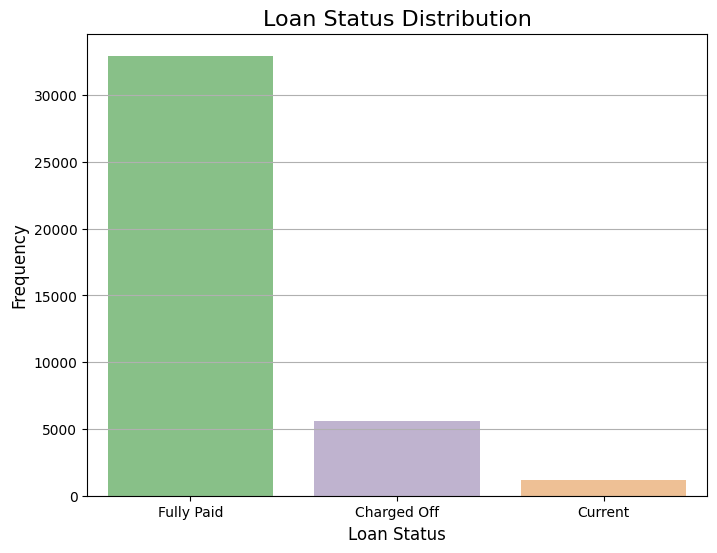

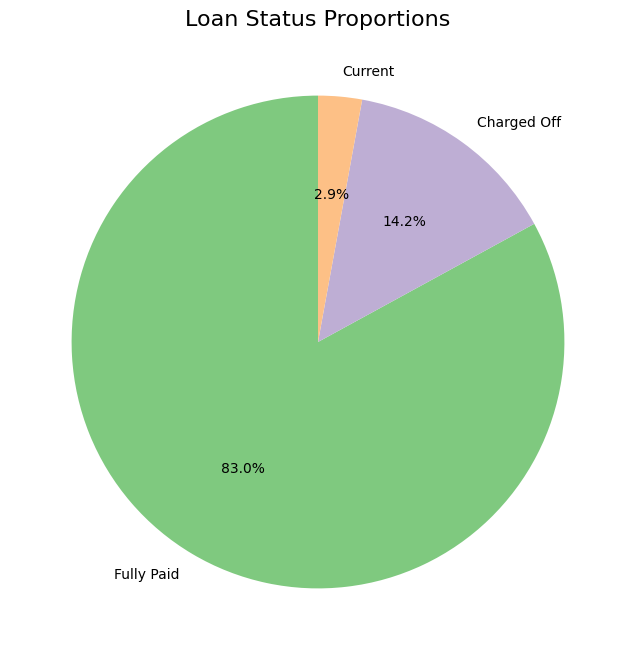

In [108]:
# Frequency Distribution
loan_status_counts = subset['loan_status'].value_counts()
print("Frequency Distribution of Loan Status:")
print(loan_status_counts)

# Proportion Analysis
loan_status_proportions = loan_status_counts / loan_status_counts.sum() * 100
print("\nProportion of Loan Status (%):")
print(loan_status_proportions)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, hue=loan_status_counts.index, palette='Accent')
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

# Pie Chart for Proportions
plt.figure(figsize=(8, 8))
plt.pie(loan_status_proportions, labels=loan_status_proportions.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Accent'))
plt.title('Loan Status Proportions', fontsize=16)
plt.show()

#### debt to income ratio (`dti`)

Descriptive Statistics for DTI:
count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


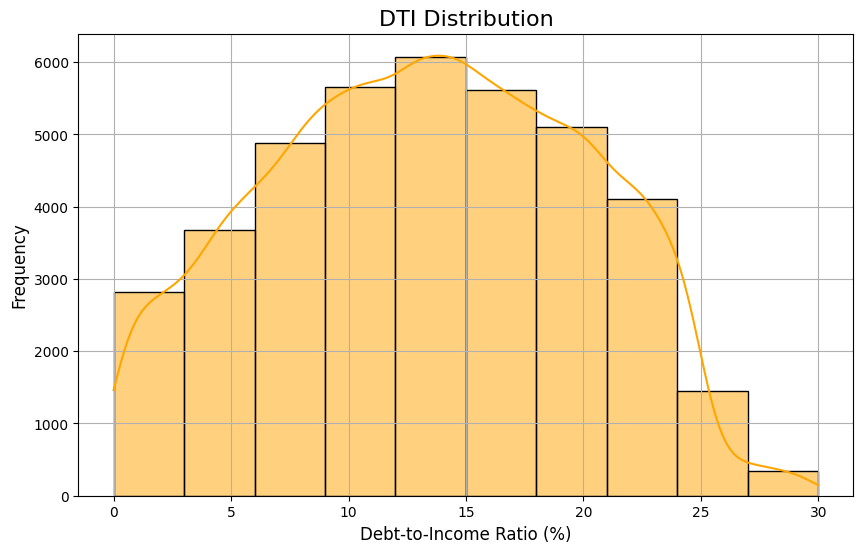

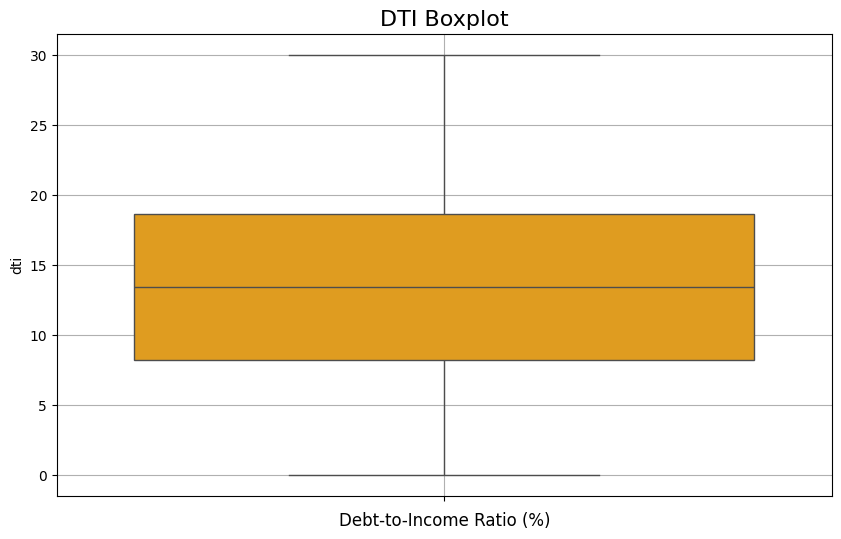

In [113]:
# Descriptive Statistics
print("Descriptive Statistics for DTI:")
print(subset['dti'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['dti'], kde=True, bins=10, color='orange', alpha=0.5)
plt.title('DTI Distribution', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot to Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(subset['dti'], color='orange')
plt.title('DTI Boxplot', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (%)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> The mean 13.31 and median 13.4 for the debt to income ratio are very near.This indicates that dti values are evenly distributed around a central point (~13.4), with no extreme values pulling the mean away from the median.
> Most borrowers have acceptable values of dti and are a low risk.

**Applications**
>  Few borrowers have dti > 20 and they can be categorized as medium risk. Sticter policies need to be in place for borrowers having > 20 dti to reduce the default risk.

#### delinq_2yrs
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

Descriptive Statistics for delinq_2yrs:
count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

Frequency Distribution:
delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64


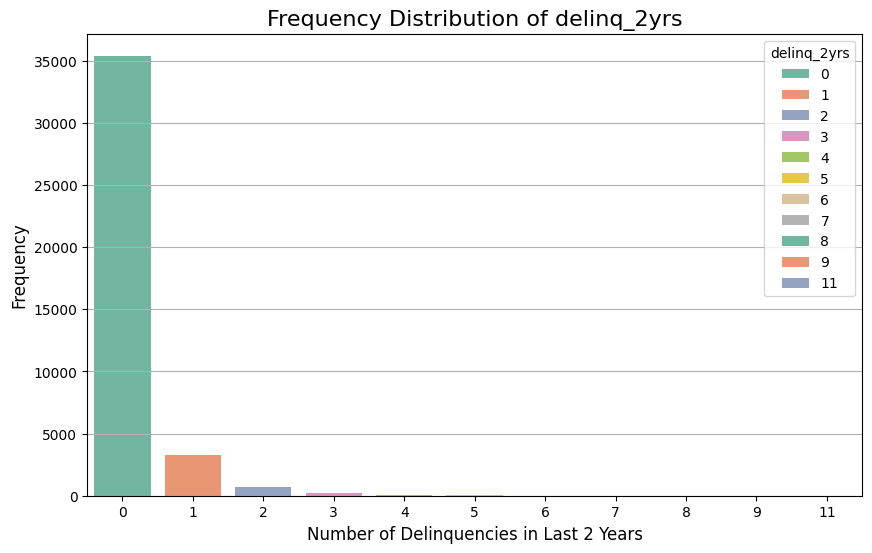

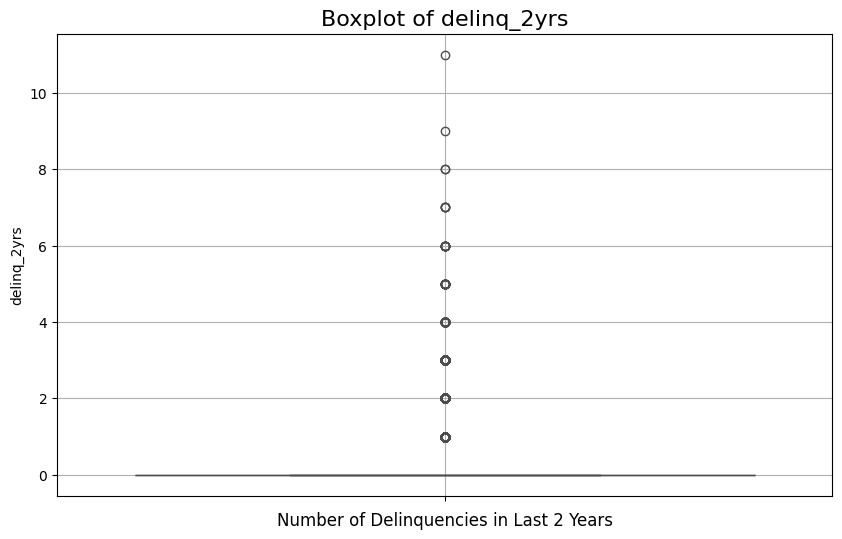

In [55]:

# Descriptive Statistics
print("Descriptive Statistics for delinq_2yrs:")
print(subset['delinq_2yrs'].describe())

# Value Counts for Frequency Distribution
value_counts = subset['delinq_2yrs'].value_counts()
print("\nFrequency Distribution:")
print(value_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='delinq_2yrs', data=subset, hue='delinq_2yrs', palette='Set2')
plt.title('Frequency Distribution of delinq_2yrs', fontsize=16)
plt.xlabel('Number of Delinquencies in Last 2 Years', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

# Boxplot to Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(subset['delinq_2yrs'], color='orange')
plt.title('Boxplot of delinq_2yrs', fontsize=16)
plt.xlabel('Number of Delinquencies in Last 2 Years', fontsize=12)
plt.grid()
plt.show()

**Insights**
> delinq_2yrs has a median value of 0, indicating most borrowers had 0 delinquencies in the last 2 years

**Applications**
> Adjust interest rates for borrowers with higher delinquency counts to compensate for risk.

#### mths_since_last_delinq
The number of months since borrower's last delinquency

In [56]:
print(subset['mths_since_last_delinq'].describe())

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64


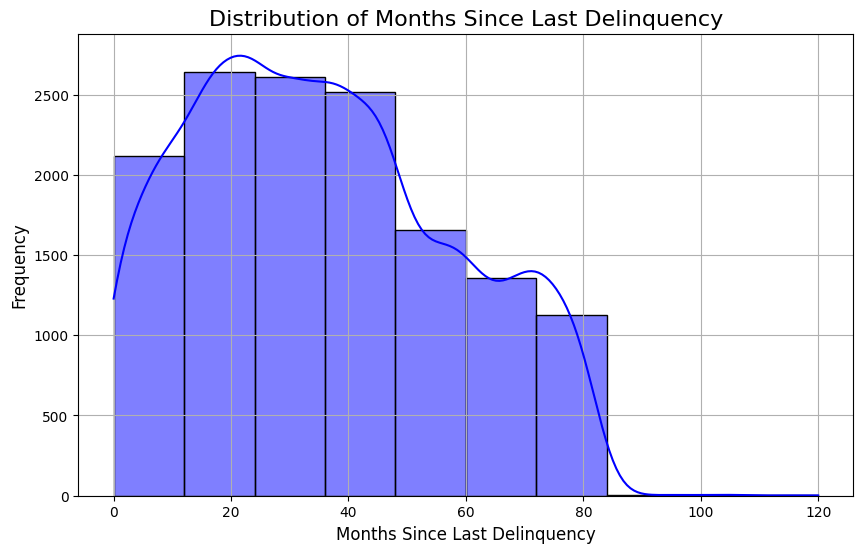

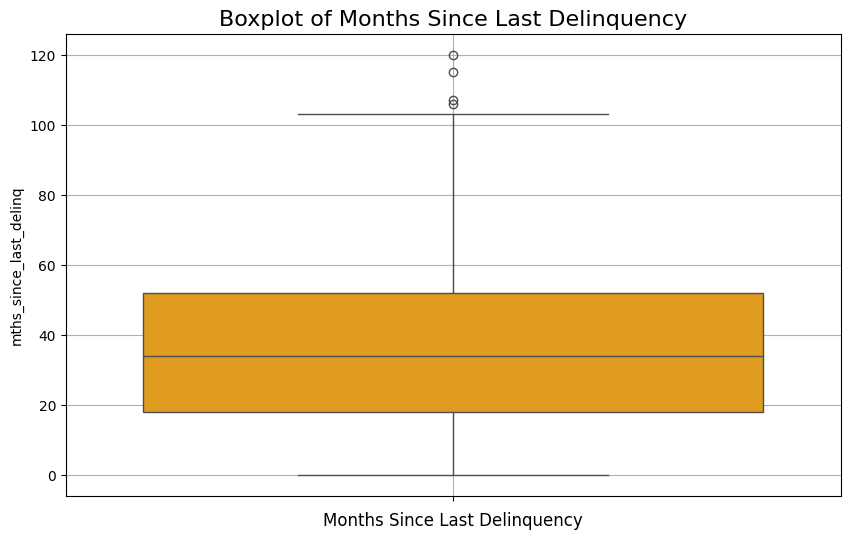

In [57]:
# Histogram 
plt.figure(figsize=(10, 6))
sns.histplot(subset.mths_since_last_delinq, kde=True, bins=10, color='blue')
plt.title('Distribution of Months Since Last Delinquency', fontsize=16)
plt.xlabel('Months Since Last Delinquency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(subset.mths_since_last_delinq, color='orange')
plt.title('Boxplot of Months Since Last Delinquency', fontsize=16)
plt.xlabel('Months Since Last Delinquency', fontsize=12)
plt.grid()
plt.show()

**Insights**
> 1. The median for the months since last delinquencies is 34 months which is low risk
> 2. Borrowers with mths_since_last_delinq < 12 are at a higher risk and need to be scrutinized further

**Applications**
> 1. Offer better terms (e.g., lower interest rates) to borrowers with longer periods since their last delinquency.
> 2. Adjust rates upward for those with recent delinquencies to compensate for higher risk.

#### annual_inc

Descriptive Statistics for annual_inc:
count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


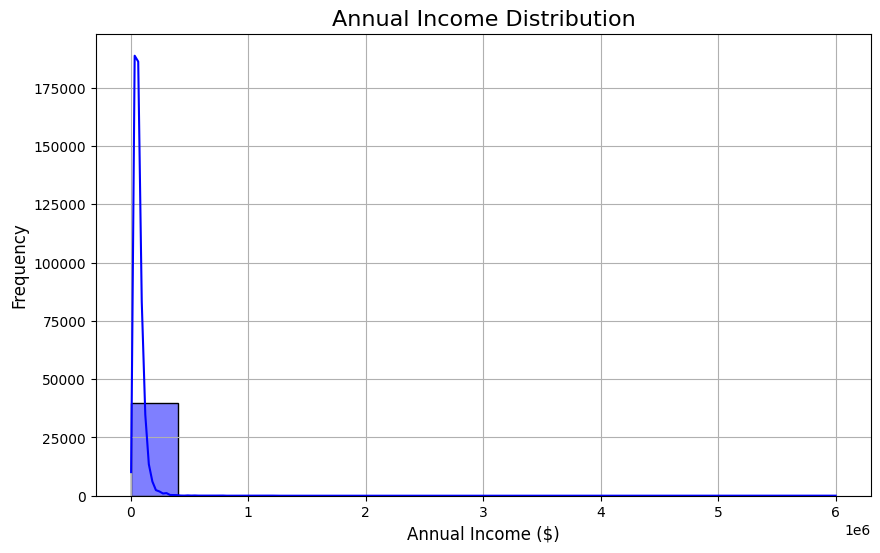

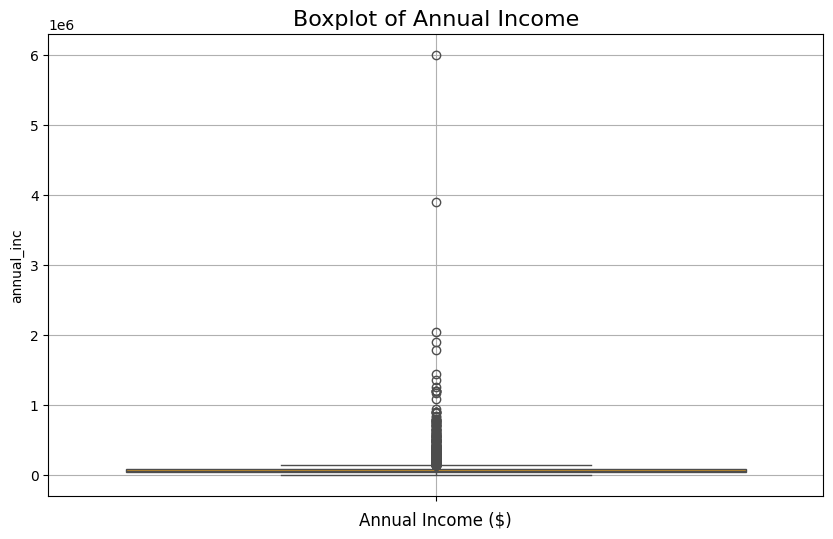

Descriptive Statistics for annual_inc:
count    33517.00000
mean     54153.59239
std      20648.49136
min       4000.00000
25%      38400.00000
50%      52000.00000
75%      70000.00000
max      99999.00000
Name: annual_inc, dtype: float64


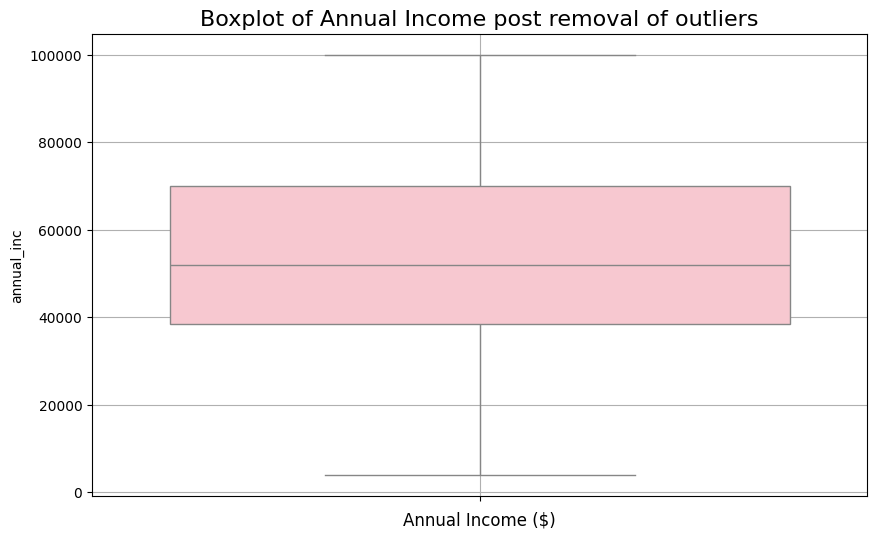

In [58]:

# Descriptive Statistics
print("Descriptive Statistics for annual_inc:")
print(subset['annual_inc'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['annual_inc'], kde=True, bins=15, color='blue')
plt.title('Annual Income Distribution', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['annual_inc'], color='orange')
plt.title('Boxplot of Annual Income', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.grid()
plt.show()

# Descriptive Statistics post removal of outliers
print("Descriptive Statistics for annual_inc:")
print(subset[subset['annual_inc'] < 100000]['annual_inc'].describe())

# Boxplot after outlier removal 
plt.figure(figsize=(10, 6))
sns.boxplot(subset[subset['annual_inc'] < 100000].annual_inc, color='pink')
plt.title('Boxplot of Annual Income post removal of outliers', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> 1. The median annual income is 59000. Once the outliers (having income > 100000) are removed, the median drops to 52000.
> 2. Common income brackets are 40000 to 70000

**Applications**
> Develop loan products tailored to common income brackets (e.g., 40,000–70,000).


#### Effect of `revol_util` on loan defaults
The revol_util variable represents the revolving credit utilization rate, calculated as the percentage of available credit currently being used by the borrower.

Descriptive Statistics for revol_util:
count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64


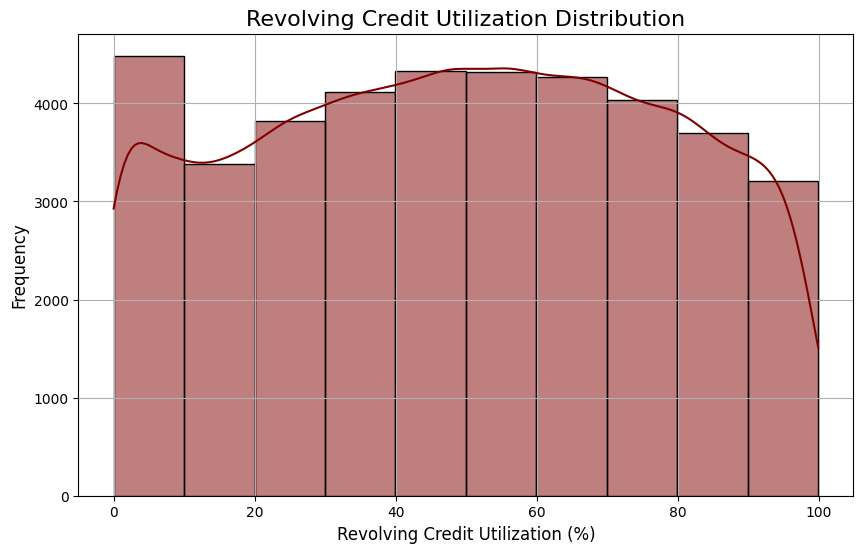

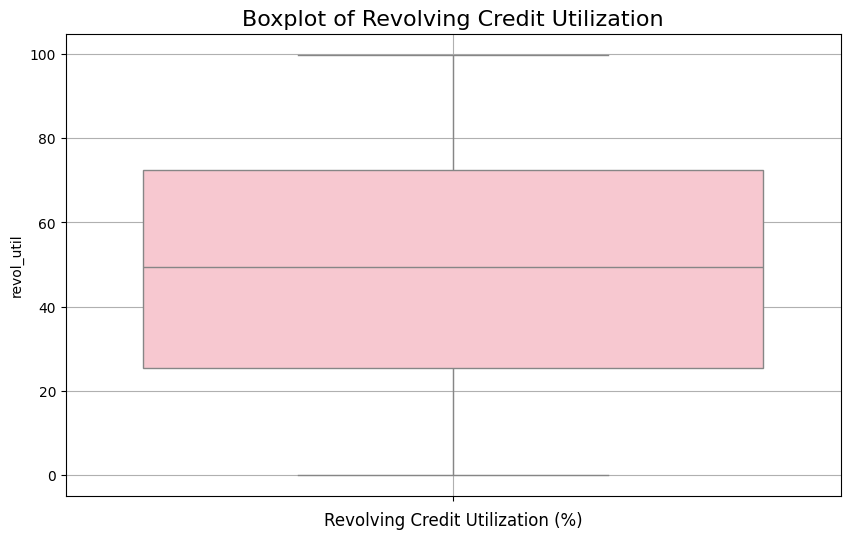

In [59]:
# Descriptive Statistics
print("Descriptive Statistics for revol_util:")
print(subset['revol_util'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['revol_util'], kde=True, bins=10, color='maroon')
plt.title('Revolving Credit Utilization Distribution', fontsize=16)
plt.xlabel('Revolving Credit Utilization (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['revol_util'], color='pink')
plt.title('Boxplot of Revolving Credit Utilization', fontsize=16)
plt.xlabel('Revolving Credit Utilization (%)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> The average typical credit utulization is 49.3%
> The variability (std) in the credit utilization is 28%
> The utilization varies from 0 to 100% for the given dataset
> Borrowers with credit utilization rate > 80 indicate risk of default
> Borrowers with utilization rates below 30% are likely to be financially stable with low credit dependency.

**Applications**
> Borrowers with high utilization rates (>80%) should be flagged for additional monitoring.
> Those with low utilization rates (<30%) may represent low-risk, financially stable individuals.
> Use revol_util as a factor in setting interest rates. Higher utilization rates may warrant higher interest rates.


#### grade

In [60]:
paid_loans.grade.value_counts()

grade
B    10250
A     9443
C     6487
D     3967
E     1948
F      657
G      198
Name: count, dtype: int64

In [61]:
charged_off_loans.grade.value_counts()

grade
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: count, dtype: int64

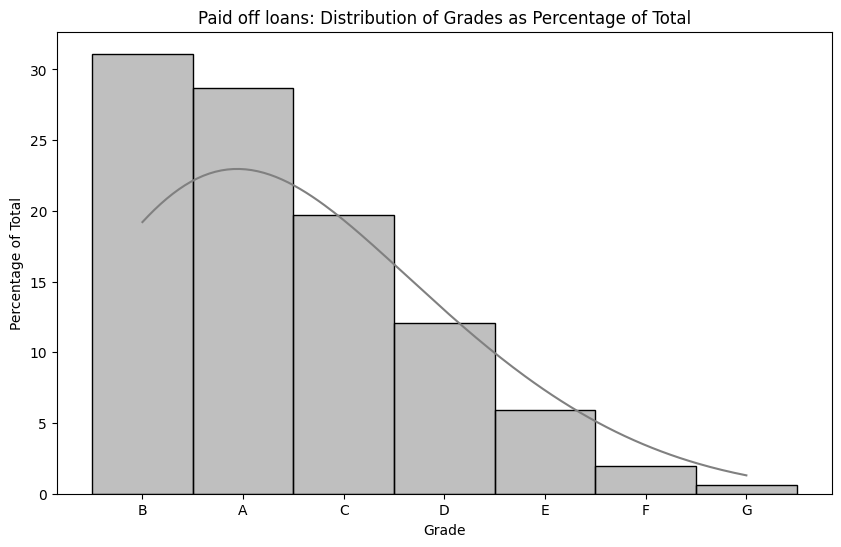

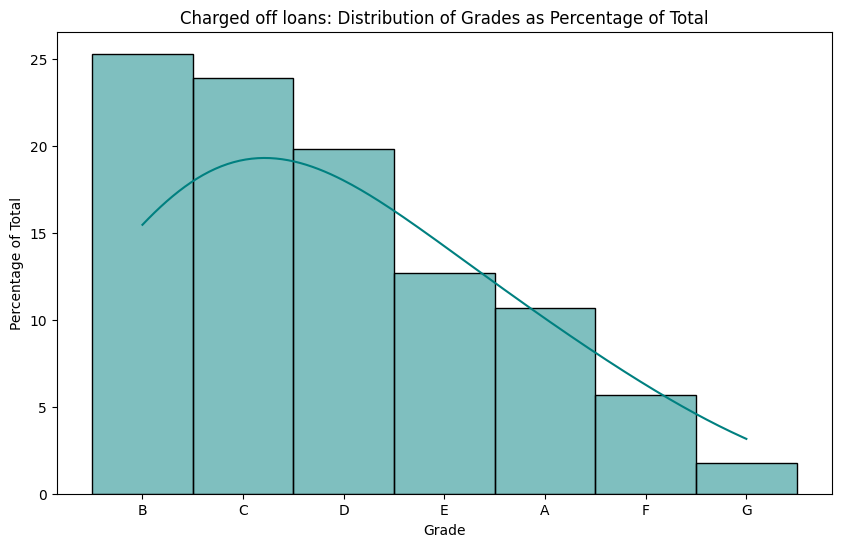

In [62]:
grade_counts = paid_loans.grade.value_counts()
grade_percentages = (grade_counts / grade_counts.sum()) * 100

plt.figure(figsize=(10, 6))
sns.histplot(x=grade_percentages.index, weights=grade_percentages.values, bins=len(grade_percentages.index), color='grey', kde=True)
plt.xlabel('Grade')
plt.ylabel('Percentage of Total')
plt.title('Paid off loans: Distribution of Grades as Percentage of Total')
plt.show()

grade_counts = charged_off_loans.grade.value_counts()
grade_percentages = (grade_counts / grade_counts.sum()) * 100

plt.figure(figsize=(10, 6))
sns.histplot(x=grade_percentages.index, weights=grade_percentages.values, bins=len(grade_percentages.index), color='teal', kde=True)
plt.xlabel('Grade')
plt.ylabel('Percentage of Total')
plt.title('Charged off loans: Distribution of Grades as Percentage of Total')
plt.show()

**Insights**
> From the plots above, it is evident that those loans that were charged off have higher percentage of loans of grade D, E, F & G as compared to the ones that were paid off

**Applications**
> Adjust lending strategies to balance risk and profitability.
> Focus monitoring efforts on lower-grade loans (D, E, F, G) to mitigate default risks.


#### sub_grade

Frequency Distribution of Sub-Grades:
sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64


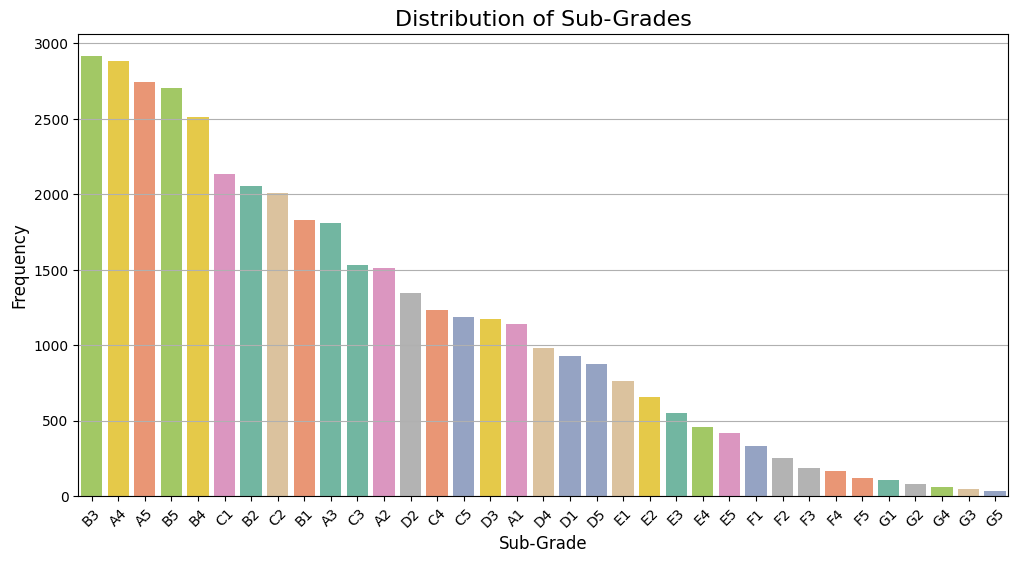

In [63]:
# Frequency Distribution
sub_grade_counts = subset['sub_grade'].value_counts()
print("Frequency Distribution of Sub-Grades:")
print(sub_grade_counts)

# Bar Plot for Sub-Grade Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=subset, x='sub_grade', hue='sub_grade', order=sub_grade_counts.index, palette='Set2')
plt.title('Distribution of Sub-Grades', fontsize=16)
plt.xlabel('Sub-Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insights**
> A high concentration in sub-grades like A3, B4, A5 suggests that most of the loans have low risk

**Applications**
> Focus monitoring efforts on higher-risk sub-grades (e.g., D5, E5).



#### revol_bal
The revol_bal variable represents the total amount of revolving credit balance the borrower owes.

Descriptive Statistics for revol_bal:
count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64


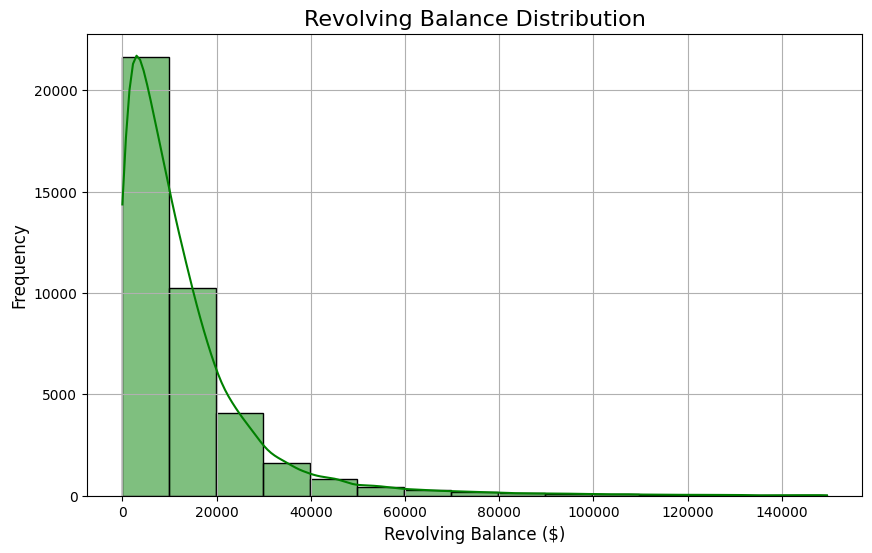

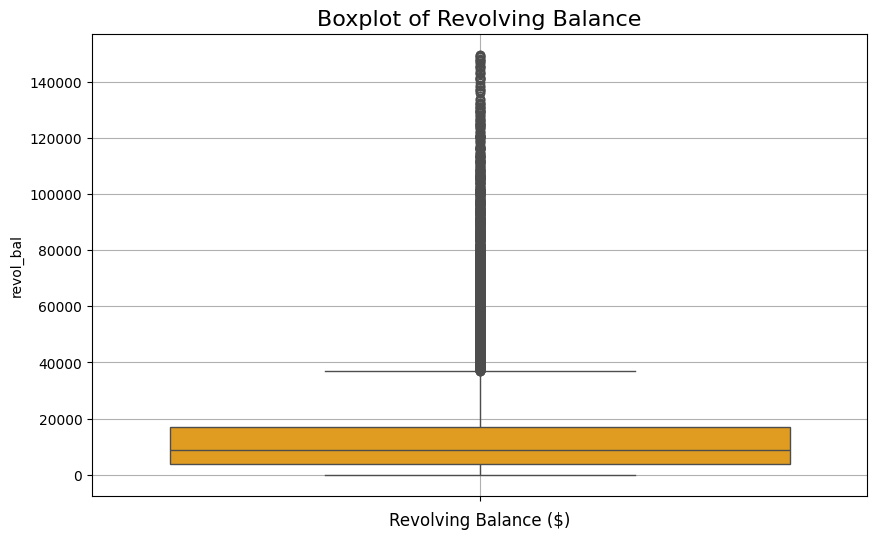

In [64]:
# Descriptive Statistics
print("Descriptive Statistics for revol_bal:")
print(subset['revol_bal'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['revol_bal'], kde=True, bins=15, color='green')
plt.title('Revolving Balance Distribution', fontsize=16)
plt.xlabel('Revolving Balance ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['revol_bal'], color='orange')
plt.title('Boxplot of Revolving Balance', fontsize=16)
plt.xlabel('Revolving Balance ($)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> The median revolving balance is 8850 whereas mean is 13382. This suggests that it's a right skewed distribution with presence of outliers
> Borrowers with balances above a certain threshold e.g. 80,000 may represent higher risk or financially stretched individuals.

**Applications**
> Borrowers with high revolving balances may be flagged for additional evaluation or stricter approval criteria.
> Use revol_bal to adjust interest rates, with higher balances indicating increased risk and justifying higher rates.

#### open_acc

Descriptive Statistics for open_acc:
count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


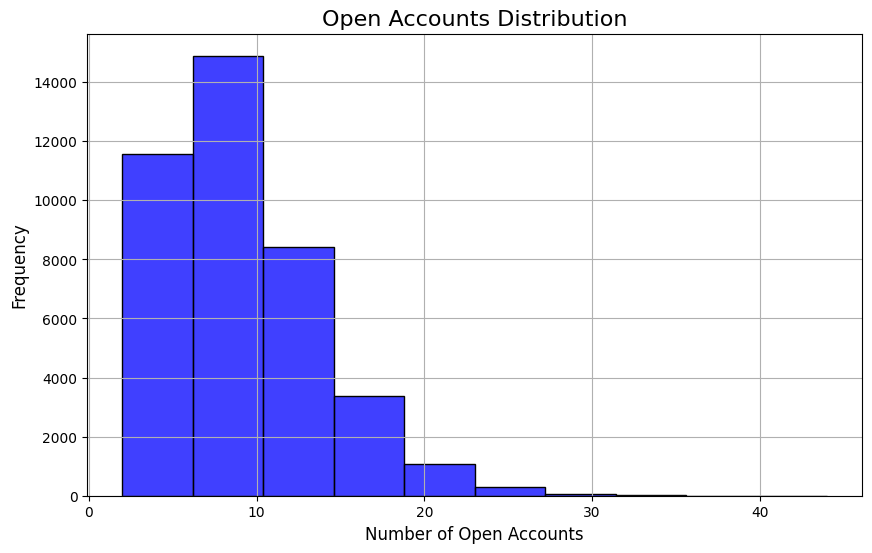

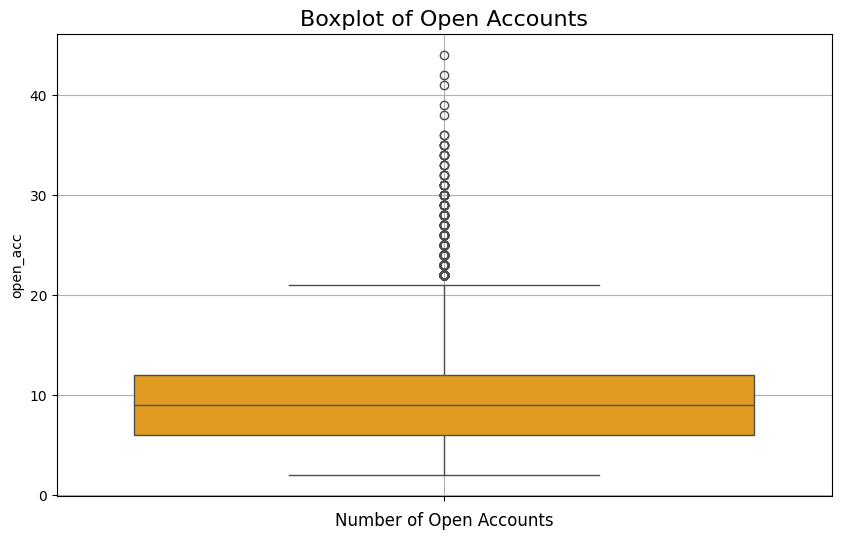

In [65]:
# Descriptive Statistics
print("Descriptive Statistics for open_acc:")
print(subset['open_acc'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['open_acc'], kde=False, bins=10, color='blue')
plt.title('Open Accounts Distribution', fontsize=16)
plt.xlabel('Number of Open Accounts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['open_acc'], color='orange')
plt.title('Boxplot of Open Accounts', fontsize=16)
plt.xlabel('Number of Open Accounts', fontsize=12)
plt.grid()
plt.show()

**Insights**
> On an average, there are 9 credit accounts per user with a min of 2.
> Borrowers with fewer accounts (e.g., <5) may indicate limited credit history, possibly higher risk.

**Applications**
> Borrowers with too many open accounts (>20) or very few (<3) may be flagged for further scrutiny.


#### total_acc

Descriptive Statistics for total_acc:
count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


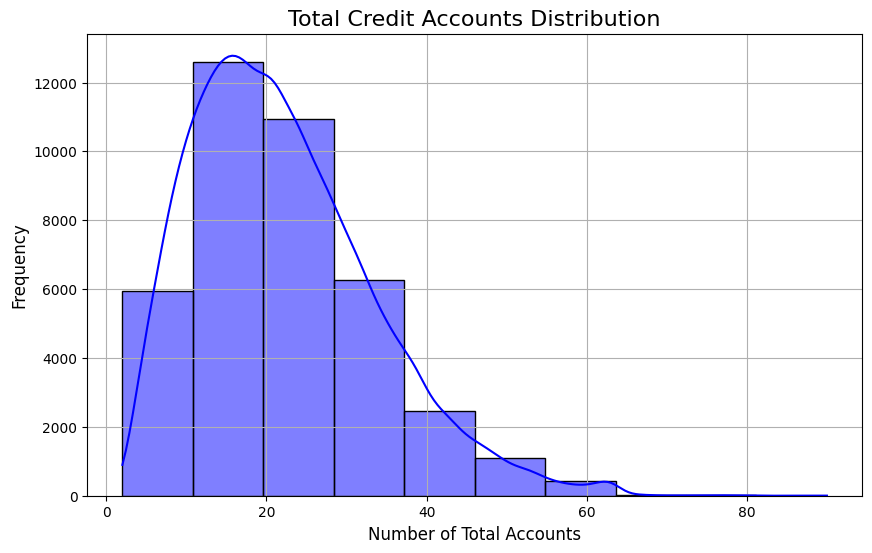

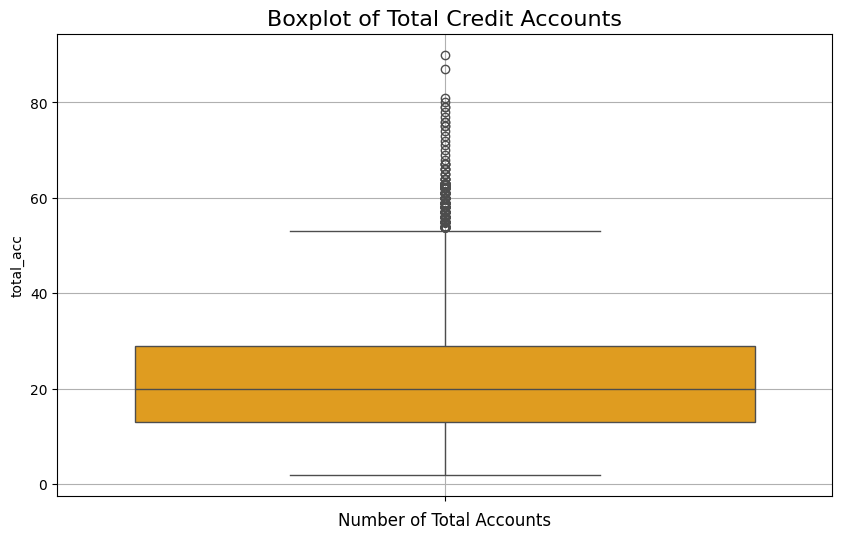

In [66]:
# Descriptive Statistics
print("Descriptive Statistics for total_acc:")
print(subset['total_acc'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['total_acc'], kde=True, bins=10, color='blue')
plt.title('Total Credit Accounts Distribution', fontsize=16)
plt.xlabel('Number of Total Accounts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['total_acc'], color='orange')
plt.title('Boxplot of Total Credit Accounts', fontsize=16)
plt.xlabel('Number of Total Accounts', fontsize=12)
plt.grid()
plt.show()

**Insights**
> 1. Borrowers have on an average 20 total credit accounts.
> 2. Borrowers with very high total_acc values (e.g., >40) may indicate extensive credit history, often associated with older or experienced credit users.
> 3. Borrowers with fewer total accounts (e.g., <10) may have a limited credit history, potentially indicating higher risk.


#### emp_length

Frequency Distribution of Employment Length (in years):
emp_length
0     5658
1     3240
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
10    8879
Name: count, dtype: int64


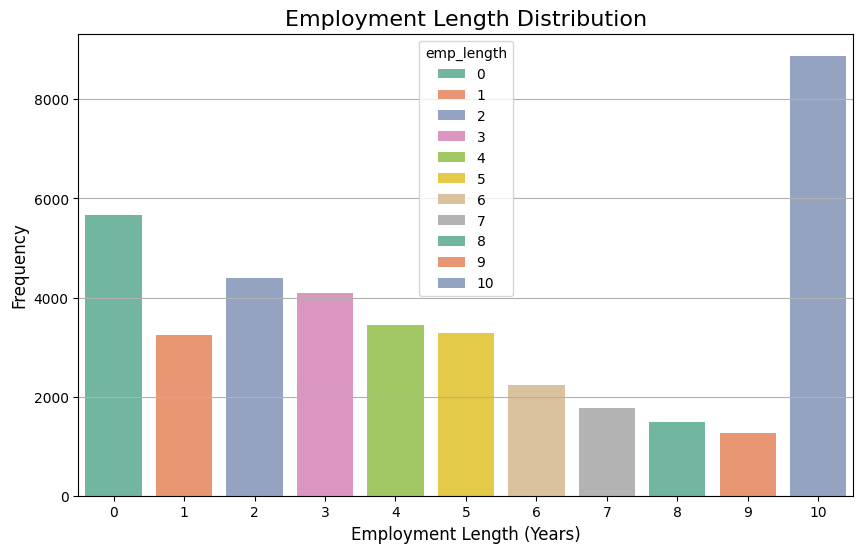

In [67]:
# Frequency Distribution
emp_length_counts = subset.emp_length.value_counts().sort_index()
print("Frequency Distribution of Employment Length (in years):")
print(emp_length_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=emp_length_counts.index, y=emp_length_counts.values, hue=emp_length_counts.index, palette='Set2')
plt.title('Employment Length Distribution', fontsize=16)
plt.xlabel('Employment Length (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

**Insights**
> Borrowers with <1 year or 1 year employment may indicate higher risk due to job instability or limited employment history.

**Applications**
> Flag borrowers with <1 year or 1 year employment for additional scrutiny.
> Set minimum employment length criteria to reduce default risk.


#### home_ownership

Frequency Distribution of Home Ownership:
home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64


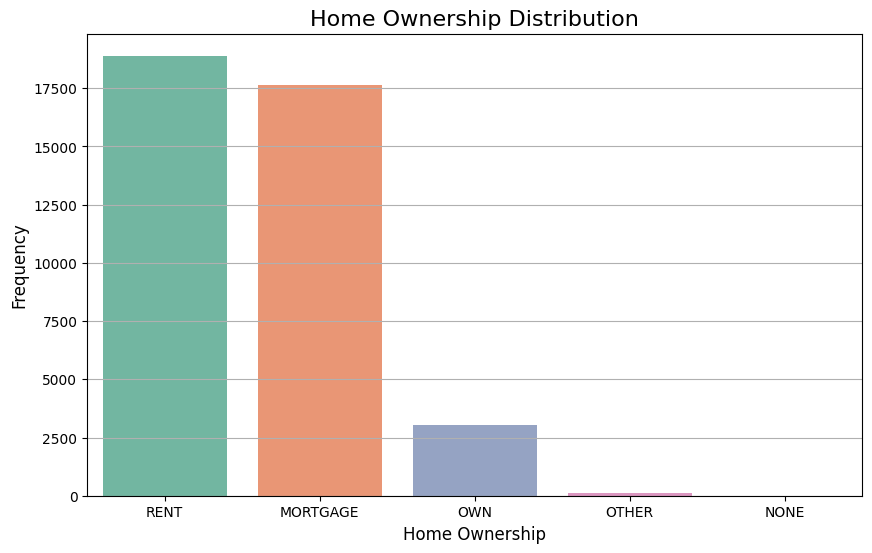

In [68]:
# Frequency Distribution
home_ownership_counts = df['home_ownership'].value_counts()
print("Frequency Distribution of Home Ownership:")
print(home_ownership_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, hue=home_ownership_counts.index, palette='Set2')
plt.title('Home Ownership Distribution', fontsize=16)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

**Insights**
> Borrowers from RENT and MORTGAGE category have formed the majority

**Applications**
> 1. Borrowers in the RENT category may be flagged for additional risk evaluation, given the potential lack of asset backing.
> 2. Adjust approval criteria or interest rates based on homeownership status.



#### zip_code

In [69]:
paid_loans.zip_code.value_counts().sort_values(ascending=False).head()

zip_code
100    513
945    451
606    445
112    437
70     390
Name: count, dtype: int64

In [70]:
charged_off_loans.zip_code.value_counts().sort_values(ascending=False).head()

zip_code
945    80
917    71
100    70
331    70
926    67
Name: count, dtype: int64

In [71]:
# Find zip codes in charged_off_loans that are not in paid_loans
zip_codes_not_in_paid = charged_off_loans[
    ~charged_off_loans.zip_code.isin(paid_loans.zip_code)
].zip_code.unique()
zip_codes_not_in_paid

array([663,  94, 999, 669, 385, 373, 833, 689])

In [72]:
charged_off_loans[charged_off_loans.zip_code.isin(zip_codes_not_in_paid)].zip_code.value_counts()

zip_code
94     2
663    1
999    1
669    1
385    1
373    1
833    1
689    1
Name: count, dtype: int64

**Insights**
> Customers from certain localities whose zip codes start with 663,  94, 999, 669, 385, 373, 833, 689 have never paid loans

**Applications**
> Adjust the lending policies for the regions with zip codes that have never paid loans or have high default rate
> Assess geographic concentration in the portfolio to diversify risk across regions.


#### addr_state

In [73]:
paid_loans.addr_state.value_counts().sort_values(ascending=False).head()

addr_state
CA    5824
NY    3203
TX    2343
FL    2277
NJ    1512
Name: count, dtype: int64

In [74]:
charged_off_loans.addr_state.value_counts().sort_values(ascending=False).head()

addr_state
CA    1125
FL     504
NY     495
TX     316
NJ     278
Name: count, dtype: int64

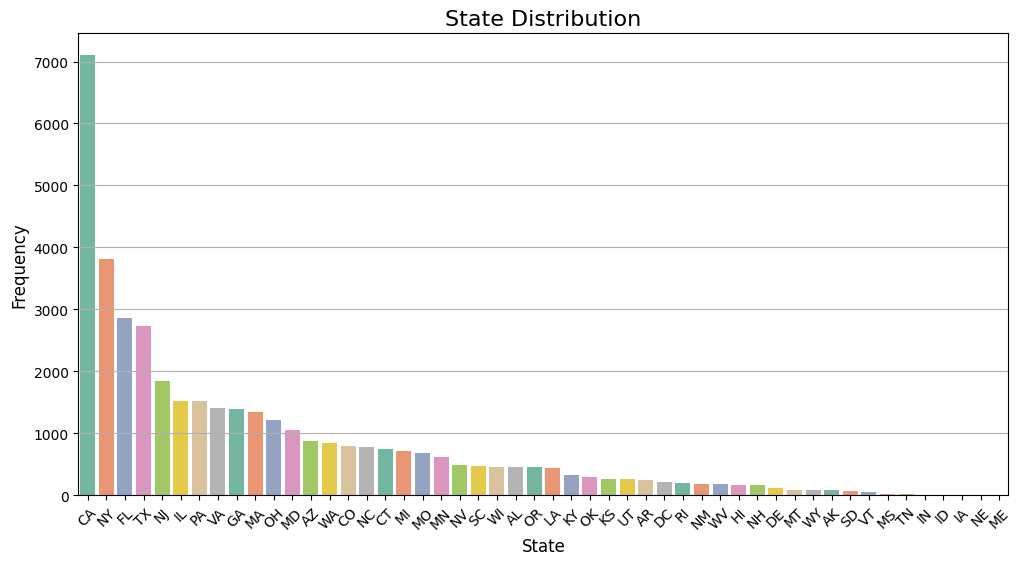

In [75]:
# Frequency Distribution
state_counts = subset['addr_state'].value_counts()

# Bar Plot for Frequency Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='Set2')
plt.title('State Distribution', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

**Insights**
> States like CA, NY, FL and TX dominate the dataset, reflecting population density or lending activity.

**Applications**
> 1. Focus marketing efforts in states with high borrower density to capture opportunities.
> 2. Assess the geographic concentration of the portfolio to reduce regional risk exposure.
> 3. Compare state-level borrower profiles or economic factors to tailor loan offerings and terms.





#### loan_amnt

Descriptive Statistics for loan_amnt:
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


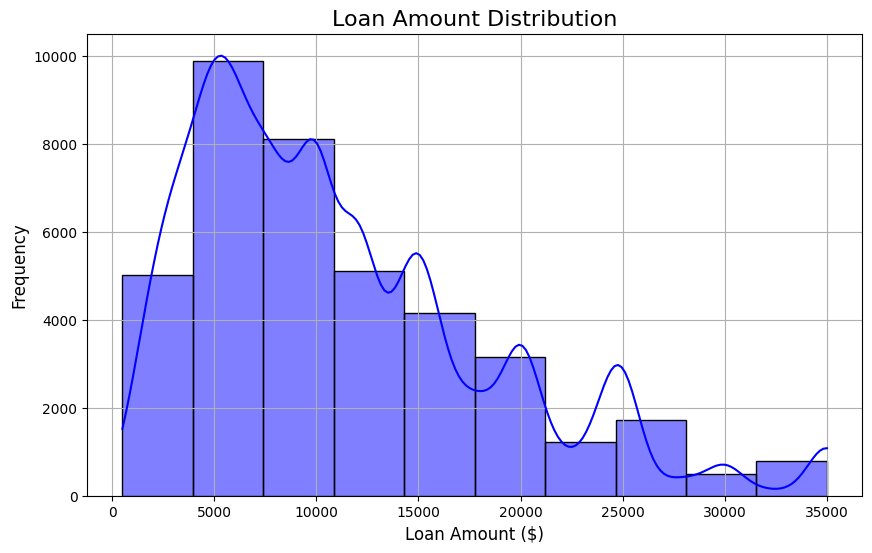

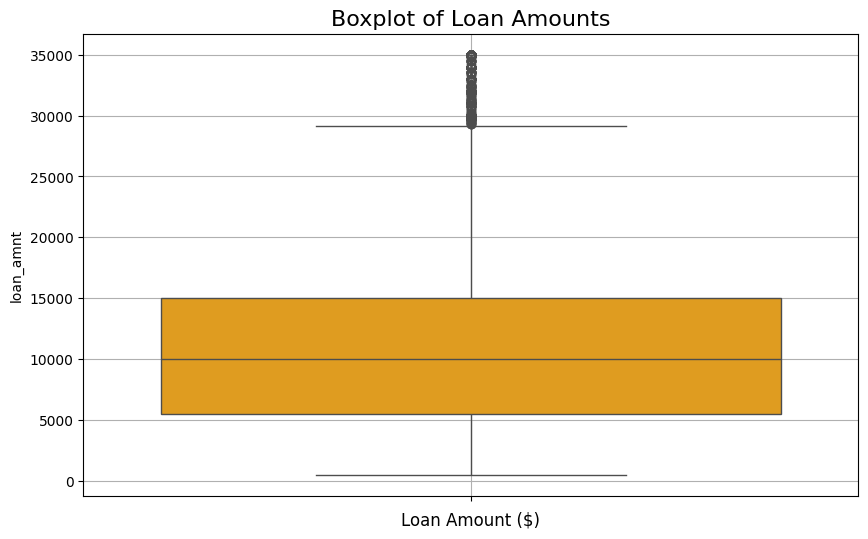

In [76]:
# Descriptive Statistics
print("Descriptive Statistics for loan_amnt:")
print(subset['loan_amnt'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['loan_amnt'], kde=True, bins=10, color='blue')
plt.title('Loan Amount Distribution', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['loan_amnt'], color='orange')
plt.title('Boxplot of Loan Amounts', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> 1. Most users prefer to take loan of 10000, possibly influenced by lender policies or borrower needs
> 2. The distribution plot of the loan amount is right-skewed which indicates that most borrowers request smaller loans, with a few requesting much larger amounts.


#### int_rate

Descriptive Statistics for int_rate:
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


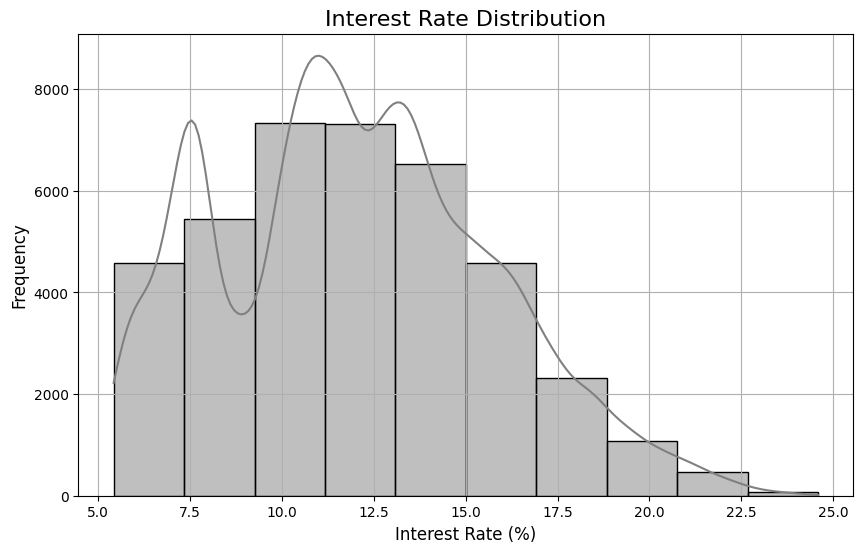

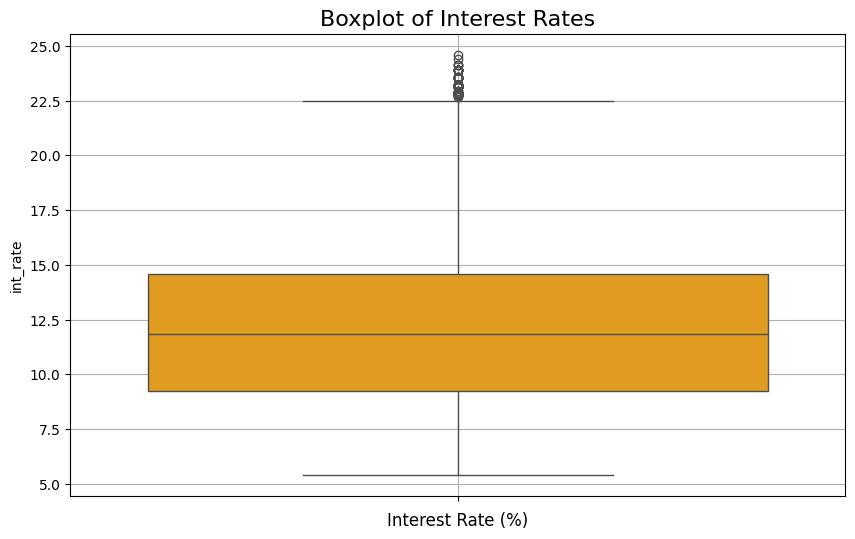

In [111]:
# Descriptive Statistics
print("Descriptive Statistics for int_rate:")
print(subset['int_rate'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['int_rate'], kde=True, bins=10, color='grey')
plt.title('Interest Rate Distribution', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['int_rate'], color='orange')
plt.title('Boxplot of Interest Rates', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> The median interest rate is 11.86%
> Extremely high interest rates may be associated with subprime borrowers or risk-based pricing.
> It is a right-skewed distribution indicating that most loans have moderate interest rates, with a few high-interest loans.

**Applications**
> Identify high-interest loans for closer monitoring, as they often indicate higher borrower risk.

 



#### term

Frequency Distribution of Loan Terms:
term
36 months    29096
60 months    10621
Name: count, dtype: int64


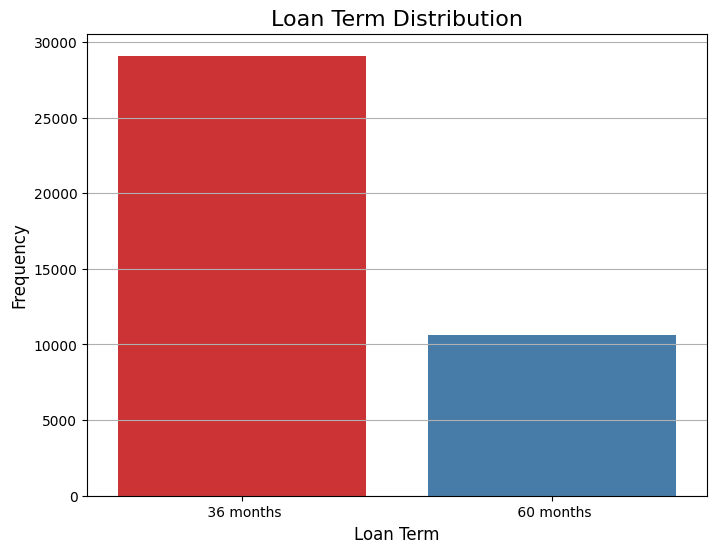

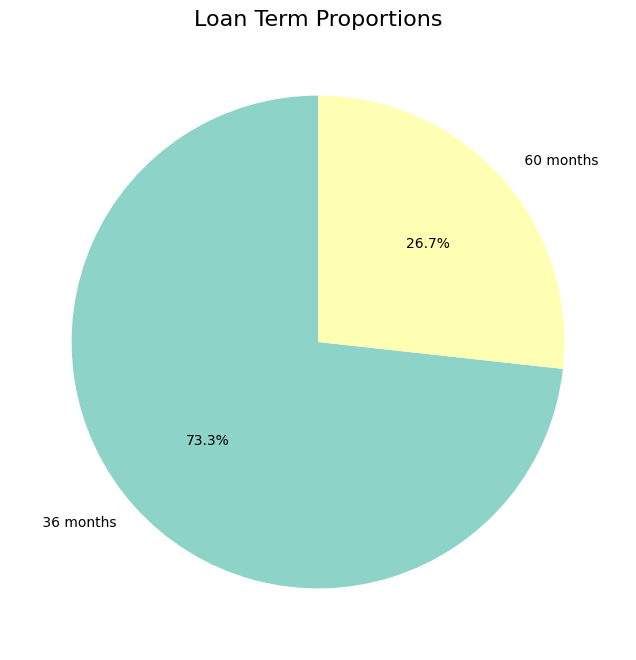

In [78]:
# Frequency Distribution
term_counts = subset['term'].value_counts()
print("Frequency Distribution of Loan Terms:")
print(term_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=term_counts.index, y=term_counts.values, hue=term_counts.index, palette='Set1')
plt.title('Loan Term Distribution', fontsize=16)
plt.xlabel('Loan Term', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

# Pie Chart for Proportion Visualization
plt.figure(figsize=(8, 8))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Loan Term Proportions', fontsize=16)
plt.show()

**Insights**
> A higher frequency of 36 months loans suggests borrowers prefer shorter repayment periods to minimize interest costs.

**Applications**
> Use insights to design marketing campaigns targeting borrowers with short term preferences.



#### verification_status

Frequency Distribution of Verification Status:
verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64


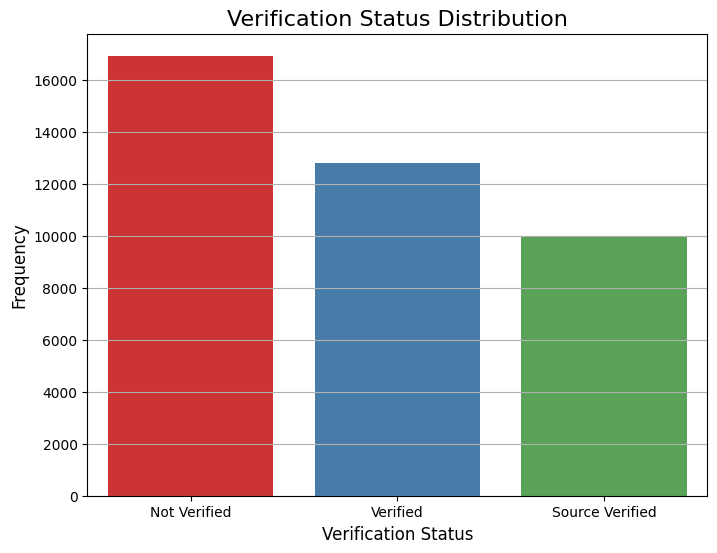

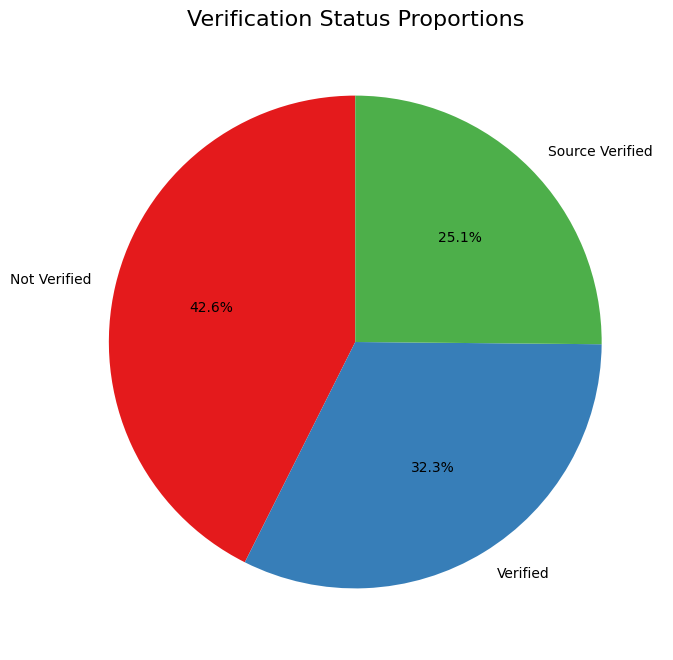

In [79]:
# Frequency Distribution
verification_counts = subset['verification_status'].value_counts()
print("Frequency Distribution of Verification Status:")
print(verification_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=verification_counts.index, y=verification_counts.values, hue=verification_counts.index, palette='Set1')
plt.title('Verification Status Distribution', fontsize=16)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

# Pie Chart for Proportion Visualization
plt.figure(figsize=(8, 8))
plt.pie(verification_counts, labels=verification_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.title('Verification Status Proportions', fontsize=16)
plt.show()

**Insights**
> 42.6% which is a significant proportion of loans are Not Verified. It may pose a higher risk.

**Applications**
> Focus monitoring efforts on Not Verified loans, as they may carry higher default risk.

#### purpose

Frequency Distribution of Loan Purpose:
purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64


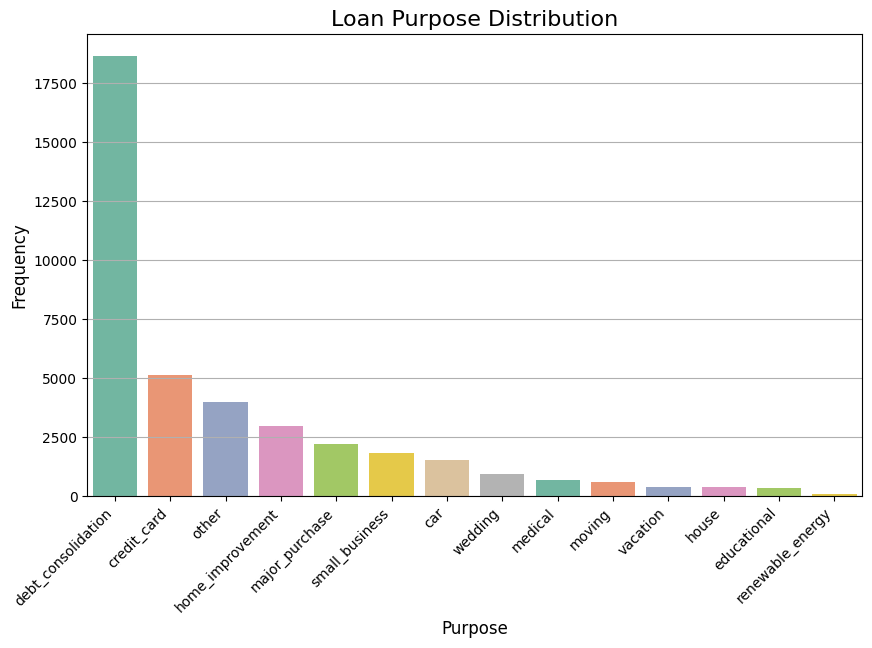

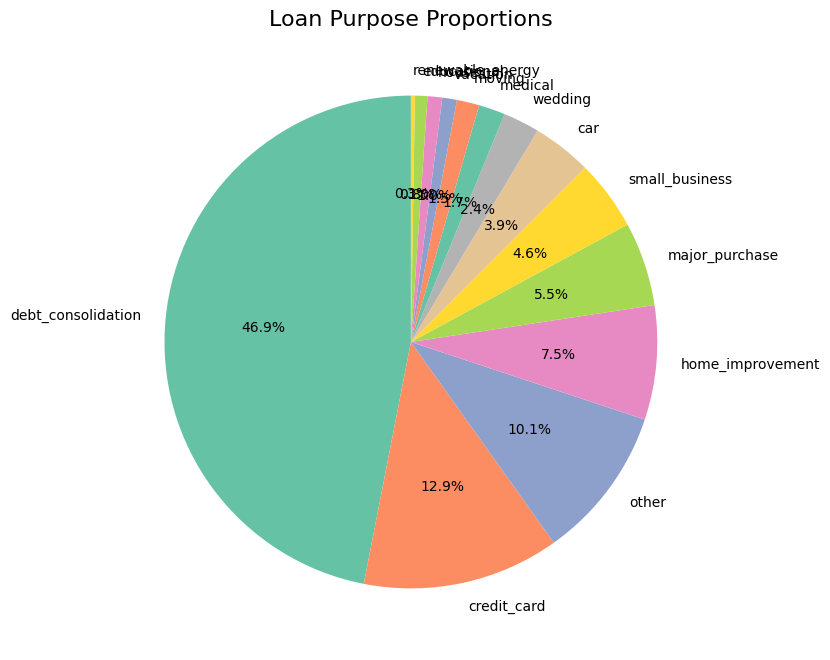

In [80]:
# Frequency Distribution
purpose_counts = subset['purpose'].value_counts()
print("Frequency Distribution of Loan Purpose:")
print(purpose_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, hue=purpose_counts.index, palette='Set2')
plt.title('Loan Purpose Distribution', fontsize=16)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Pie Chart for Proportion Visualization
plt.figure(figsize=(8, 8))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Loan Purpose Proportions', fontsize=16)
plt.show()

**Insights**
> The categories like debt_consolidation 46.9% and credit card 12.9% dominate.
> Suprizingly, house category is less frequent. 

**Applications**
> Develop tailored products for high-demand purposes (e.g., Debt Consolidation and Credit Card refinancing).


#### installment

Descriptive Statistics for installment:
count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


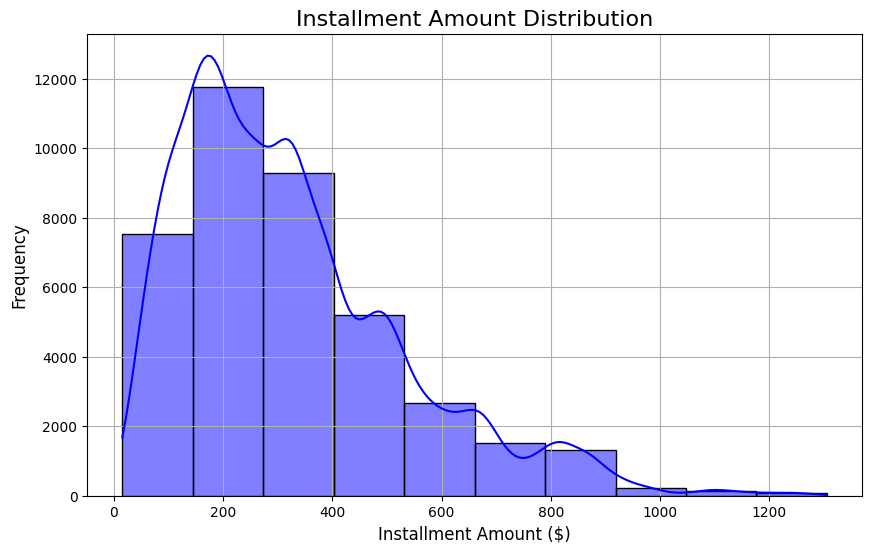

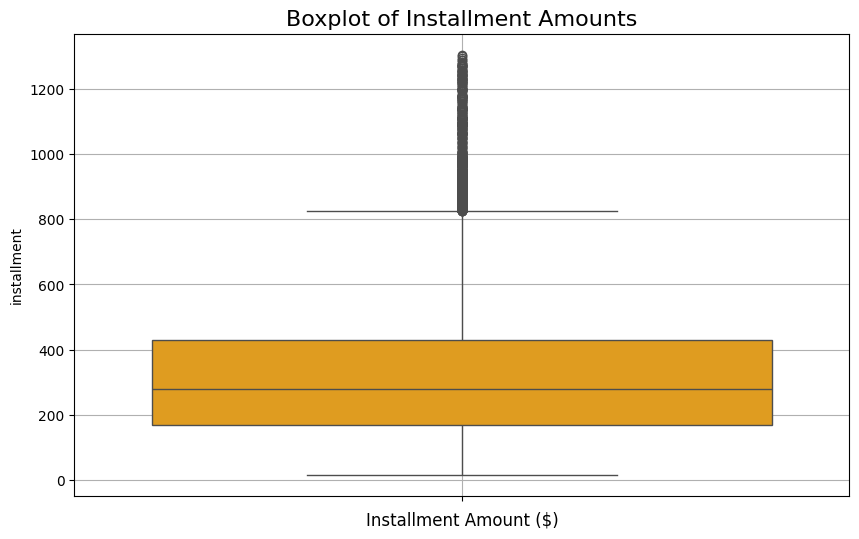

In [81]:
# Descriptive Statistics
print("Descriptive Statistics for installment:")
print(subset['installment'].describe())

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(subset['installment'], kde=True, bins=10, color='blue')
plt.title('Installment Amount Distribution', fontsize=16)
plt.xlabel('Installment Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(subset['installment'], color='orange')
plt.title('Boxplot of Installment Amounts', fontsize=16)
plt.xlabel('Installment Amount ($)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> The distribution of installments is right-skewed which suggests that most borrowers have moderate monthly payments (centering around $280), with a few having significantly higher installments.

**Applications**
> Design repayment plans that align with popular installment brackets (\\$200 to \\$400) for borrower convenience.


#### pub_rec

Frequency Distribution of Public Records:
pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64


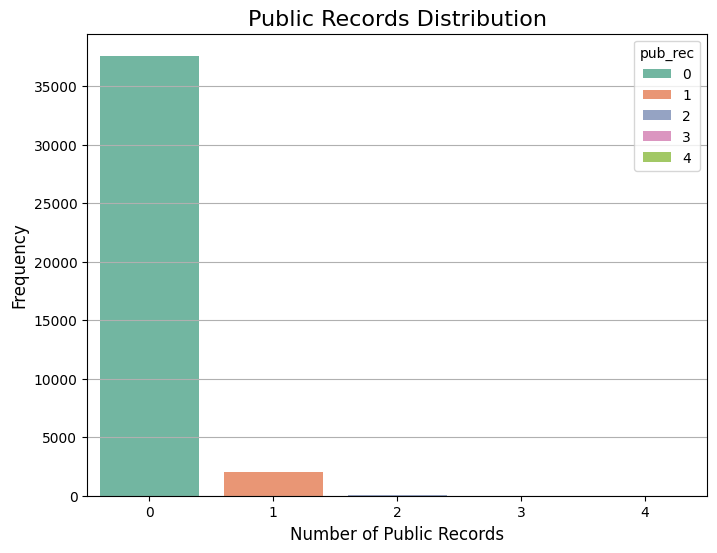

In [82]:

# Frequency Distribution
pub_rec_counts = subset['pub_rec'].value_counts()
print("Frequency Distribution of Public Records:")
print(pub_rec_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=pub_rec_counts.index, y=pub_rec_counts.values, hue=pub_rec_counts.index, palette='Set2')
plt.title('Public Records Distribution', fontsize=16)
plt.xlabel('Number of Public Records', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

> Public record does not impact the loan default rate.

**Insights**
> A high proportion of borrowers with zero public records suggests a low-risk profile for the majority.

**Applications**
> Flag borrowers with one or more public records for additional risk evaluation.
> Regularly monitor loans associated with borrowers having multiple public records to identify early warning signs.


#### pub_rec_bankruptcies

Frequency Distribution of Public Record Bankruptcies:
pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


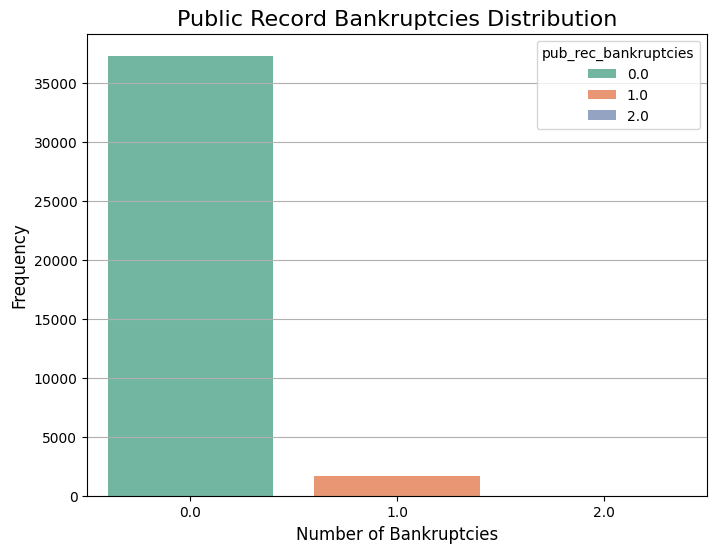

In [83]:
# Frequency Distribution
bankruptcy_counts = subset['pub_rec_bankruptcies'].value_counts()
print("Frequency Distribution of Public Record Bankruptcies:")
print(bankruptcy_counts)

# Bar Plot for Frequency Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=bankruptcy_counts.index, y=bankruptcy_counts.values, hue=bankruptcy_counts.index, palette='Set2')
plt.title('Public Record Bankruptcies Distribution', fontsize=16)
plt.xlabel('Number of Bankruptcies', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

**Insights**
> A high portion of borrowers have 0 bankruptcies
> Few borrowers have one or more backruptcies and they indicate a significant risk

**Applications**
> Borrowers with one or more bankruptcies can be flagged for closer scrutiny during the loan approval process.

### Segmented Univariate Analysis

#### loan_status vs loan_amt

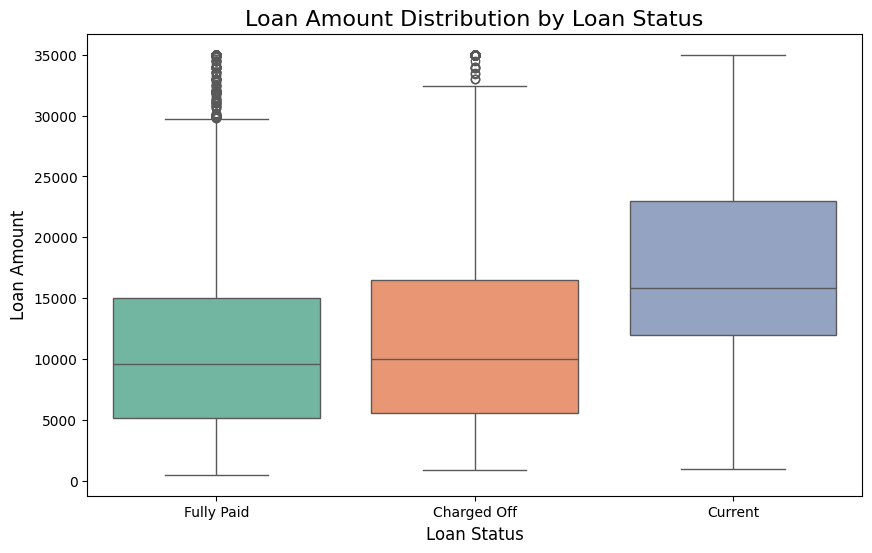

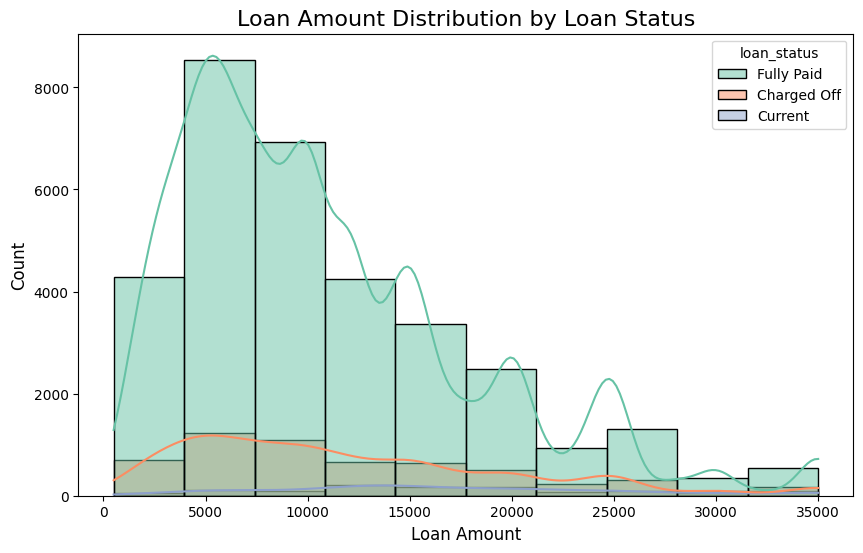

In [84]:
# Boxplot to compare loan amounts by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x='loan_status', y='loan_amnt', hue='loan_status', palette='Set2')
plt.title('Loan Amount Distribution by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.show()

# Histogram to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x='loan_amnt', hue='loan_status', kde=True, palette='Set2', bins=10)
plt.title('Loan Amount Distribution by Loan Status', fontsize=16)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Insights**:
> 1. Charged off loans are showing slightly higher median loan amounts
> 2. Fully paid loans cluster around smaller loan amounts

**Applications**:
> 1. Cap loan amounts for high-risk applicants.
> 2. Apply more stringent approval criteria for larger loans.

#### term vs int_rate

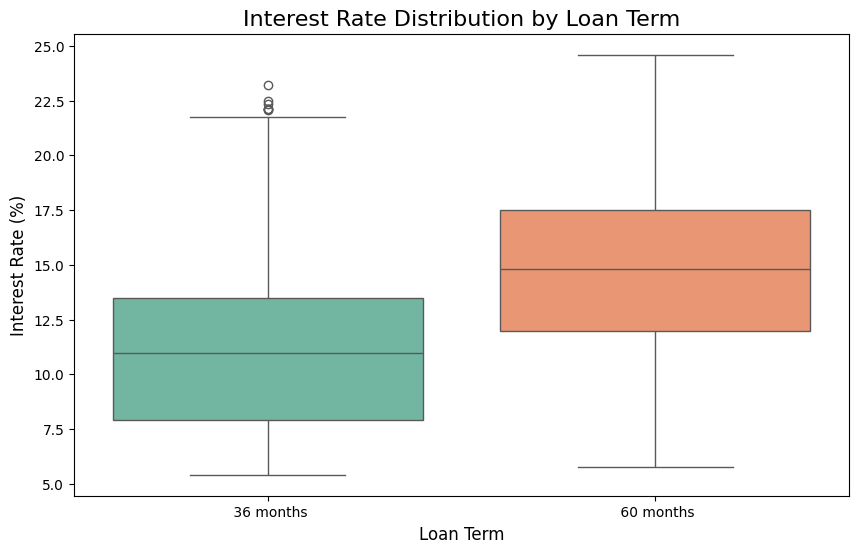

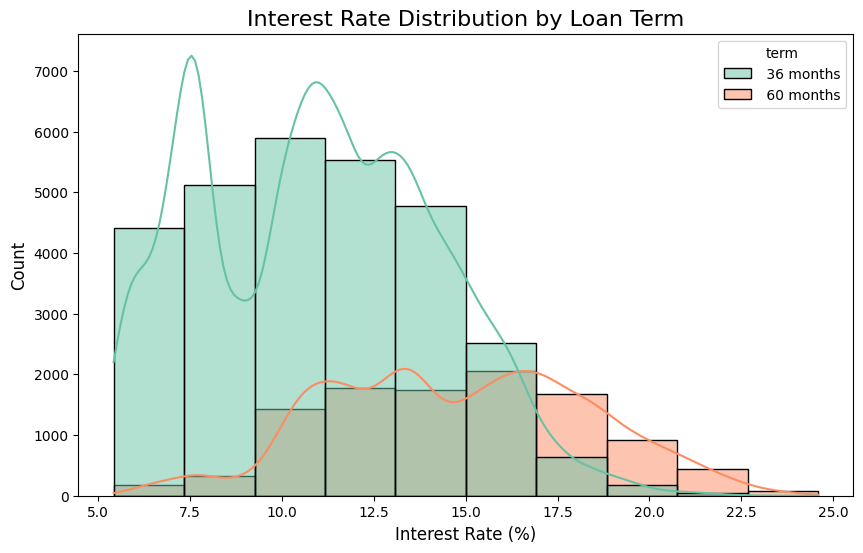

In [85]:
# Boxplot to compare interest rates by loan term
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x='term', y='int_rate', hue='term', palette='Set2')
plt.title('Interest Rate Distribution by Loan Term', fontsize=16)
plt.xlabel('Loan Term', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.show()

# Histogram to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x='int_rate', hue='term', kde=True, palette='Set2', bins=10)
plt.title('Interest Rate Distribution by Loan Term', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Insights:**
> 1. Longer loan terms (60 months) are associated with higher interest rates due to the increased risk over a longer repayment period.
> 2. Shorter loan terms (36 months) tend to have lower interest rates and less variability.

**Applications:**
> 1. Offer lower interest rates for shorter terms to attract low-risk borrowers.
> 2. Highlight the increased cost of longer-term loans to customers during the approval process to encourage shorter-term borrowing when appropriate.

#### grade vs dti

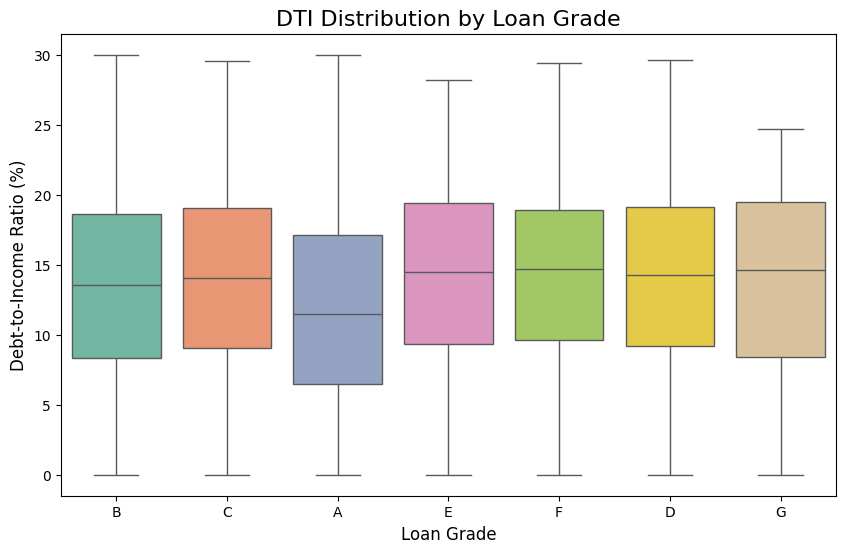

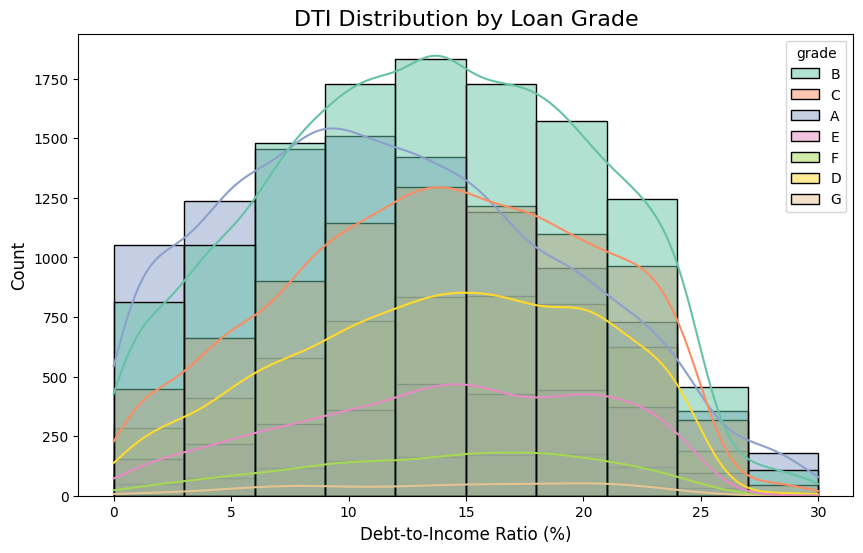

In [86]:
# Boxplot to compare DTI by loan grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x='grade', y='dti', hue='grade', palette='Set2')
plt.title('DTI Distribution by Loan Grade', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Debt-to-Income Ratio (%)', fontsize=12)
plt.show()

# Histogram to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x='dti', hue='grade', kde=True, palette='Set2', bins=10)
plt.title('DTI Distribution by Loan Grade', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**Insights:**
> 1. Highet DTIs (> 9) correlate to lower credit grades (e.g. C, D, etc)
> 2. Lower DTIs are associated with higher grades (A, B) indicating better repayment capacity

**Applications:**
> 1. Loan Approval Criteria: Use dti thresholds to refine approval guidelines for each grade. For example: Approve loans for grades C or below only if dti is within acceptable limits.
> 2. Interest Rate Adjustments: Adjust interest rates based on the combined impact of grade and dti. Borrowers with lower grades and high dti may warrant higher interest rates.
> 3. Risk-Based Decisioning: Flag applications with high dti and lower grades for closer review before approval.

#### home_ownership vs annual_inc

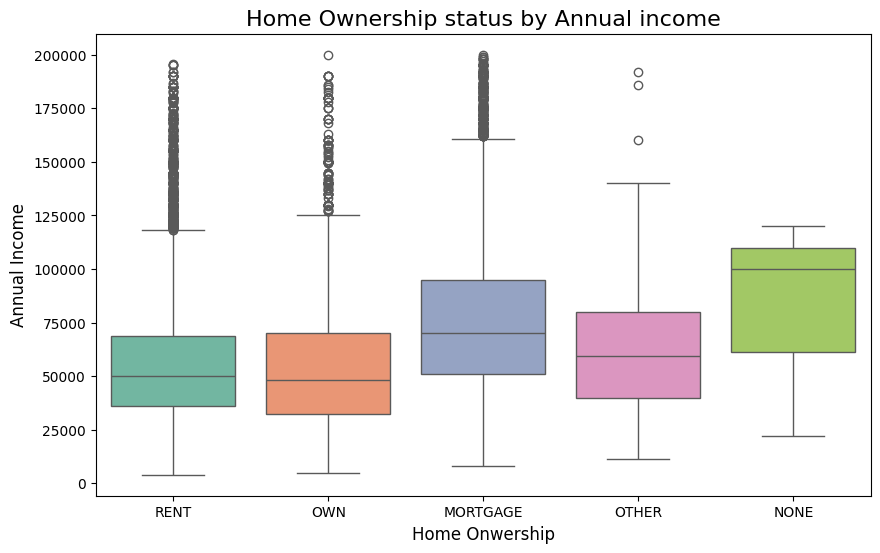

In [87]:
# Boxplot to compare home_ownership by annual_inc
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset[subset.annual_inc < 200000], x='home_ownership', y='annual_inc', hue='home_ownership', palette='Set2')
plt.title('Home Ownership status by Annual income', fontsize=16)
plt.xlabel('Home Onwership', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.show()

**Insights:**
> 1. Borrowers with MORTGAGE have the highest median incomes (excluding the NONE category), likely reflecting better financial stability

**Applications:**
> 1. Loan Approval Strategy: Use home_ownership as an additional criterion for assessing borrower risk, especially for lower-income renters.
> 2. Tailored Loan Offers: Offer more favorable terms (e.g., lower interest rates or higher loan amounts) to borrowers in the OWN and MORTGAGE categories with higher incomes.

#### verification_status vs int_rate

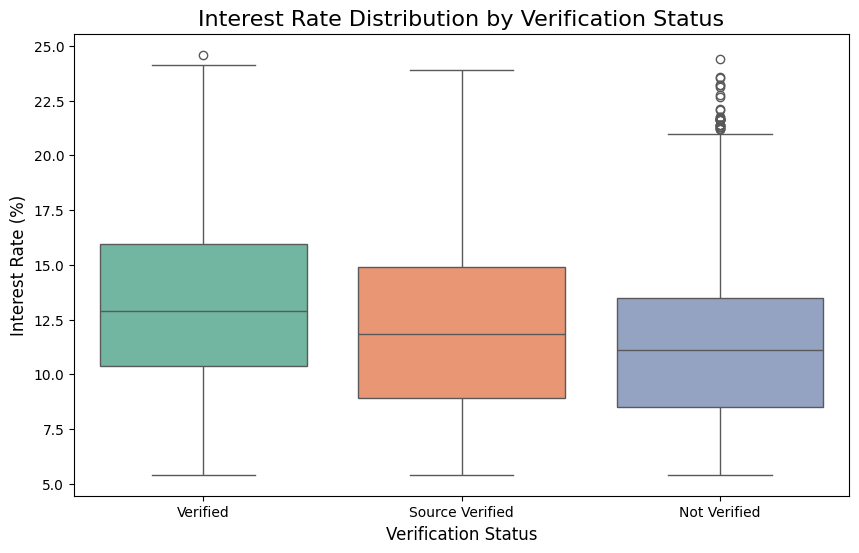

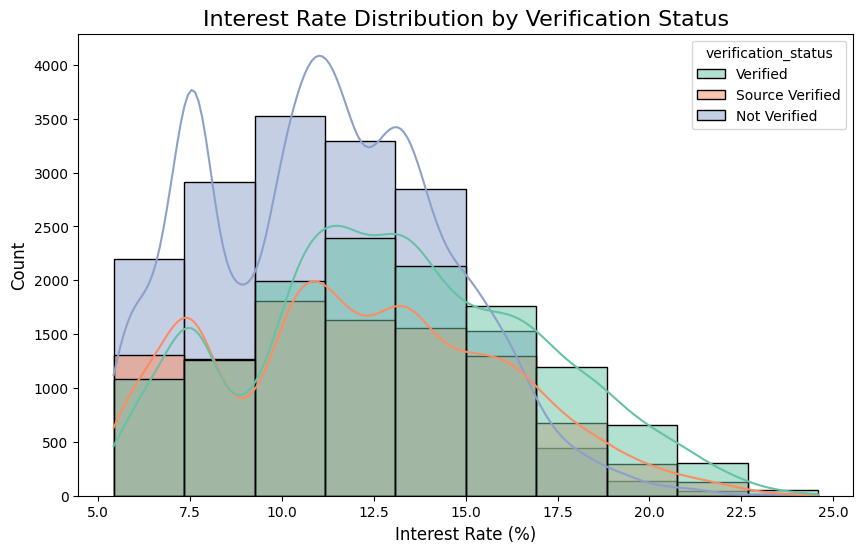

In [88]:
# Boxplot to compare interest rates by verification status
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x='verification_status', y='int_rate', hue='verification_status', palette='Set2')
plt.title('Interest Rate Distribution by Verification Status', fontsize=16)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.show()

# Histogram to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x='int_rate', hue='verification_status', kde=True, palette='Set2', bins=10)
plt.title('Interest Rate Distribution by Verification Status', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Insights:**
> 1. Borrowers with loans not verified have the least interest rate and those with their loans verified have the highest interest rates. It should have been the other way around. 
> 2. Not verified borrowers are clustering around lower interest rates

**Applications:**
> 1. Interest Rate Policies: Offer lower interest rates to borrowers with verified income, encouraging them to apply and boosting approval rates for lower-risk individuals.
> 2. Risk-Based Approvals: Set stricter thresholds or additional requirements for Not Verified applicants to mitigate risk while maintaining profitability.
> 3. Targeted Verification: Encourage income verification to move borrowers into lower-risk categories and justify lower interest rates.

#### addr_state vs loan_status

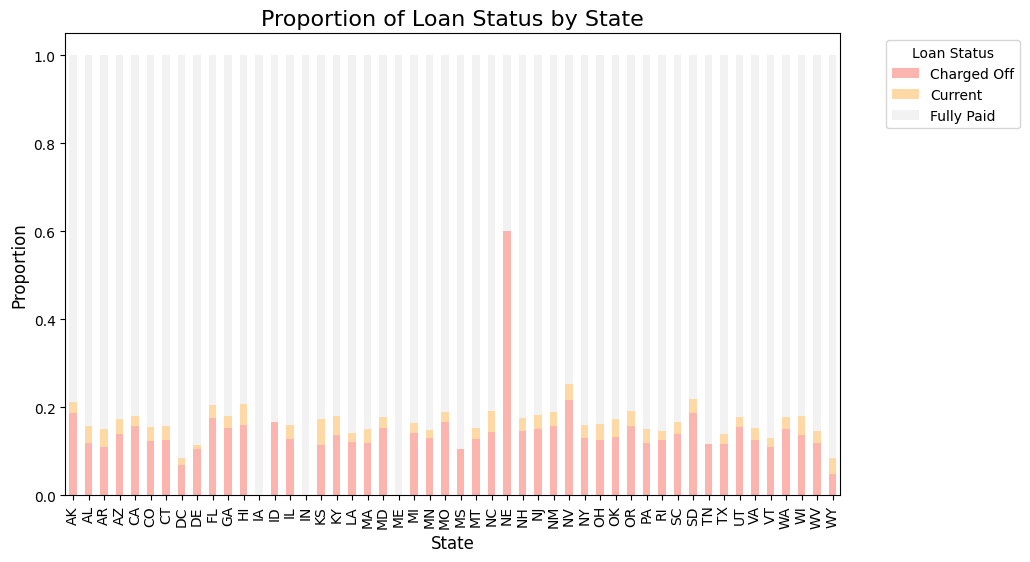

In [89]:
# Calculate proportions of loan_status by state
status_counts = subset.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
total_counts = status_counts.groupby('addr_state')['count'].transform('sum')
status_counts['proportion'] = status_counts['count'] / total_counts

# Pivot data for visualization
pivot_table = status_counts.pivot(index='addr_state', columns='loan_status', values='proportion').fillna(0)

# Stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Proportion of Loan Status by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights:**
> 1. The state NE has the highest number of defaults, followed by NV, indicating higher default risk in this area.
> 2. States like IA, IN, ME have highest percentage of fully paid loans and can be considered as low risk regions.

**Applications:**
> 1. Risk-Based Loan Approvals: Apply stricter approval criteria or adjusted loan terms (e.g., higher interest rates) in high-risk states.
> 2. Geographic Targeting: Focus marketing and loan offerings in states with higher proportions of Fully Paid loans to capture reliable borrowers.
> 3. Regional Monitoring: Monitor economic conditions and policies in high-default states to adjust risk models dynamically.

#### purpose vs loan_amnt and dti

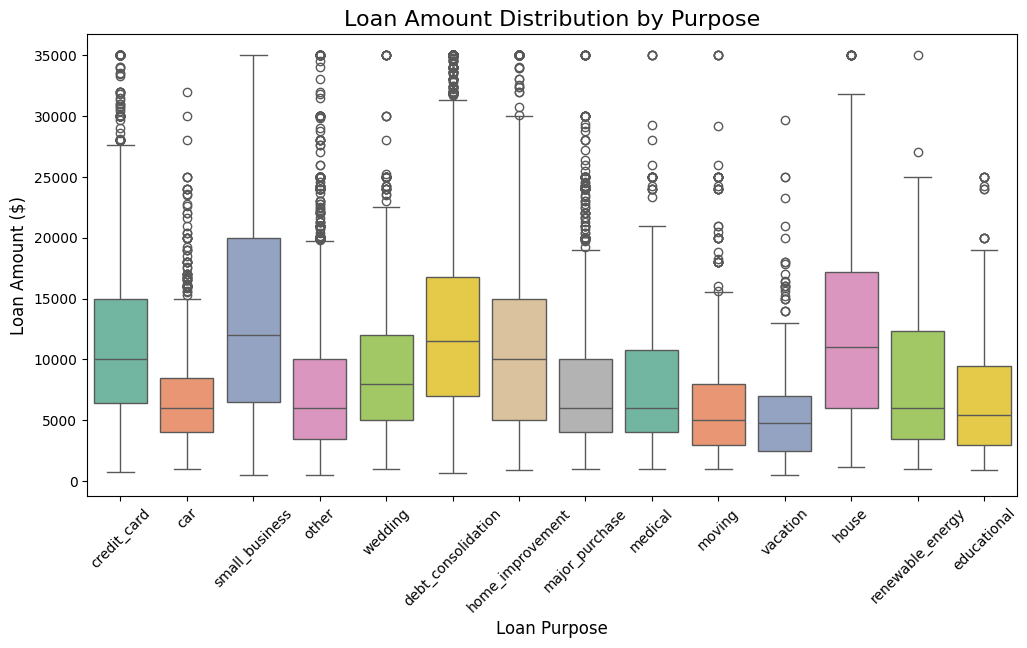

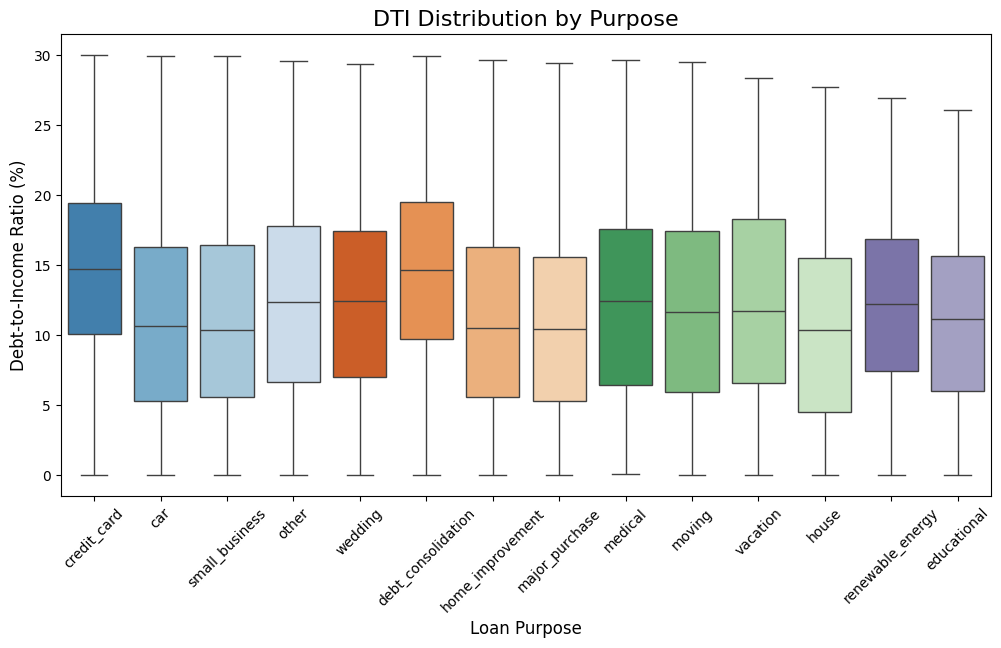

In [90]:
# Boxplot for loan amount by purpose
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='purpose', y='loan_amnt', hue='purpose', palette='Set2')
plt.title('Loan Amount Distribution by Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Boxplot for DTI by purpose
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='purpose', y='dti', hue='purpose', palette='tab20c')
plt.title('DTI Distribution by Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Debt-to-Income Ratio (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insights:**
> 1. Debt Consolidation have higher median loan amounts as borrowers consolidate multiple debts.
> 2. Vacation purpos have lower loan amounts due to a comparitively smaller expense need.
> 3. Borrowers with Credit Card and Debt Consolidation purposes often have higher dti, reflecting existing financial strain.


**Applications:**
> 1. Loan Approval Strategy: Apply stricter DTI thresholds for purposes like Credit Card and Debt Consolidation to minimize risk.
> 2. Interest Rate Adjustment: Offer more competitive interest rates for loans taken for Vacation and moving purposes, as they may have lower default risk.
> 3. Portfolio Monitoring: Monitor loan performance closely for Debt Consolidation loans due to higher loan amounts and potential risk factors.

### Bivariate Analysis

#### loan_amnt vs annual income

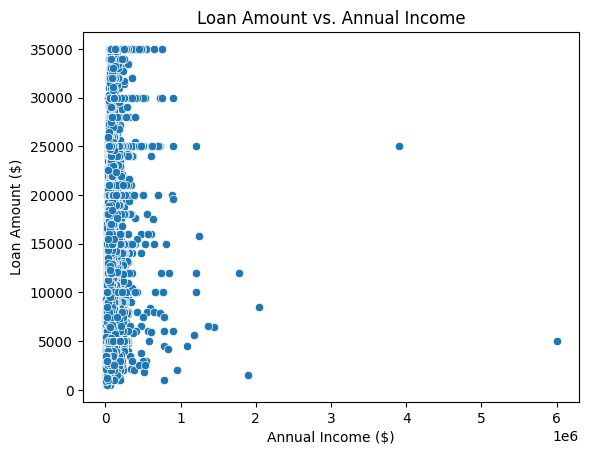

Pearson Correlation Coefficient: 0.27


In [91]:

# Scatter plot for loan amount vs. annual income
sns.scatterplot(data=subset, x='annual_inc', y='loan_amnt')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.show()

# Calculate Pearson correlation
correlation = df['annual_inc'].corr(df['loan_amnt'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

**Insights**
> Loan amount is not directly correlated with the annual income, there exists a positive correlation, but it's very low (0.27)

#### int_rate vs loan_status

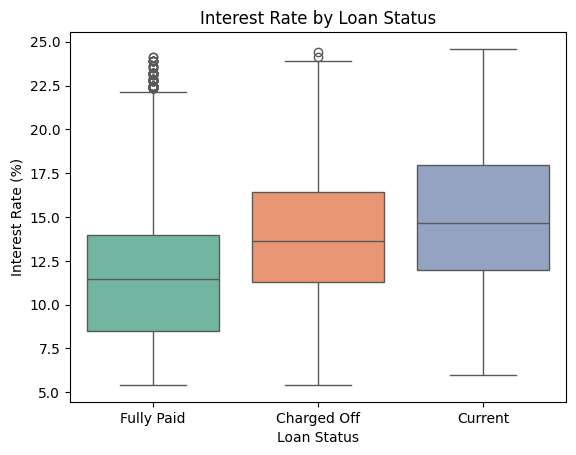

In [92]:

sns.boxplot(data=subset, x='loan_status', y='int_rate', hue='loan_status', palette='Set2')
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

**Insights**
> Higher median interest rate for Charged Off loans might indicate that high interest rates contribute to repayment difficulties.

#### grade vs loan_status

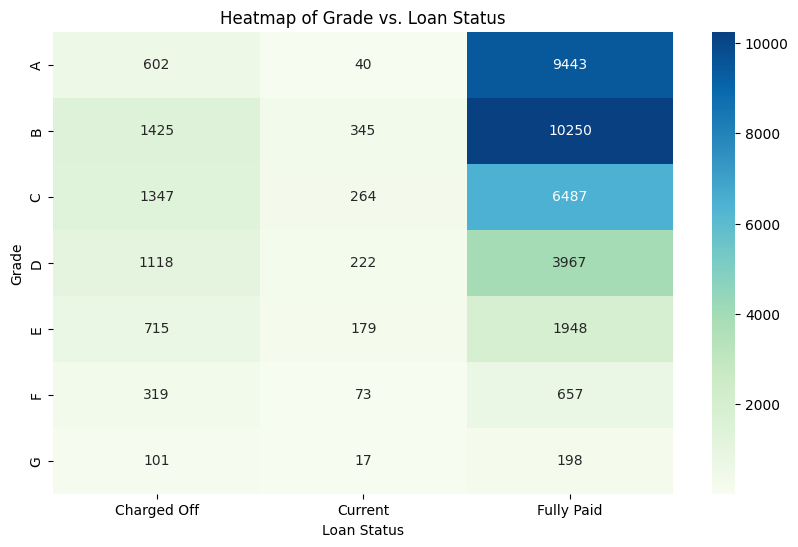

In [93]:
# Create a pivot table to analyze the relationship between grade and loan_status
pivot_table = pd.pivot_table(subset, values='int_rate', index='grade', columns='loan_status', aggfunc='count')

# Generate a heatmap from the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='GnBu')
plt.title('Heatmap of Grade vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.show()

**Insights**
> Fully paid loans have a greater number of higher grades whereas Charged off loans have a larger number of lower grades.
> This indicates that there's a strong correlation between grades and loan status, lower the grade, higher are the chances of default. 

#### grade vs int_rate

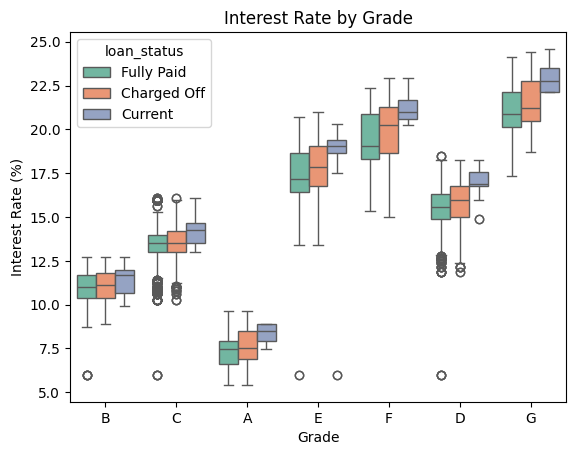

In [94]:

sns.boxplot(data=subset, x='grade', y='int_rate', hue='loan_status', palette='Set2')
plt.title('Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

**Insights**
> Lower grade loans have the highest interest rate due to increased risk of lending

#### purpose vs int_rate

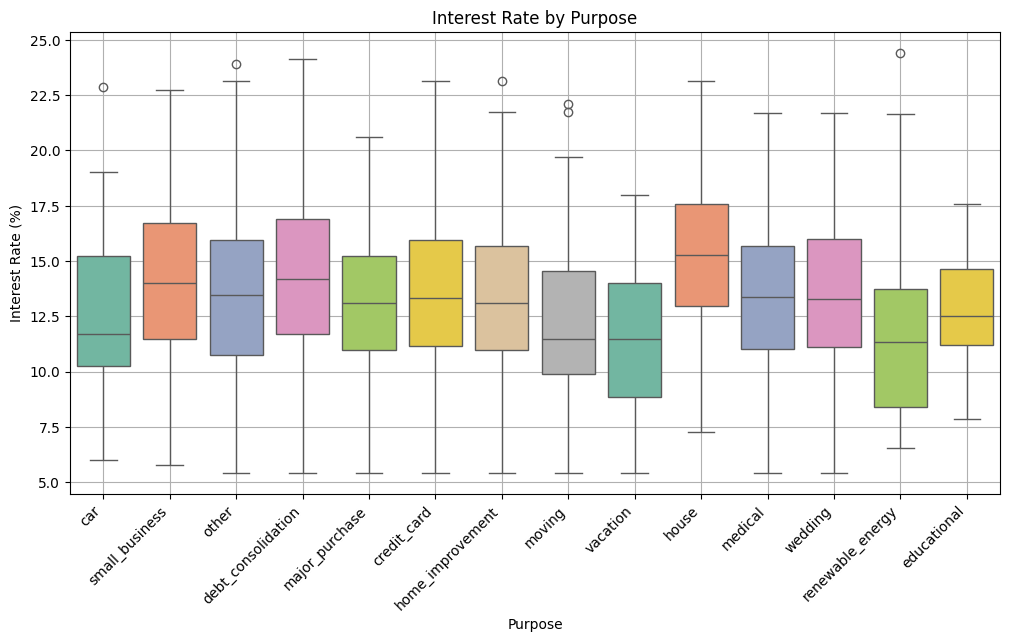

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(data=charged_off_loans, x='purpose', y='int_rate', hue='purpose', palette='Set2')
plt.title('Interest Rate by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

**Insights**
> Loans taken for house purpose have the highest interest rate. However, earlier analysis shows that loans taken for debt_consolidation are more prone to default

**Application**
> The interest rate for loans taken for debt_consolidation should be increased and those for house can be reduced.


#### loan_amnt vs dti

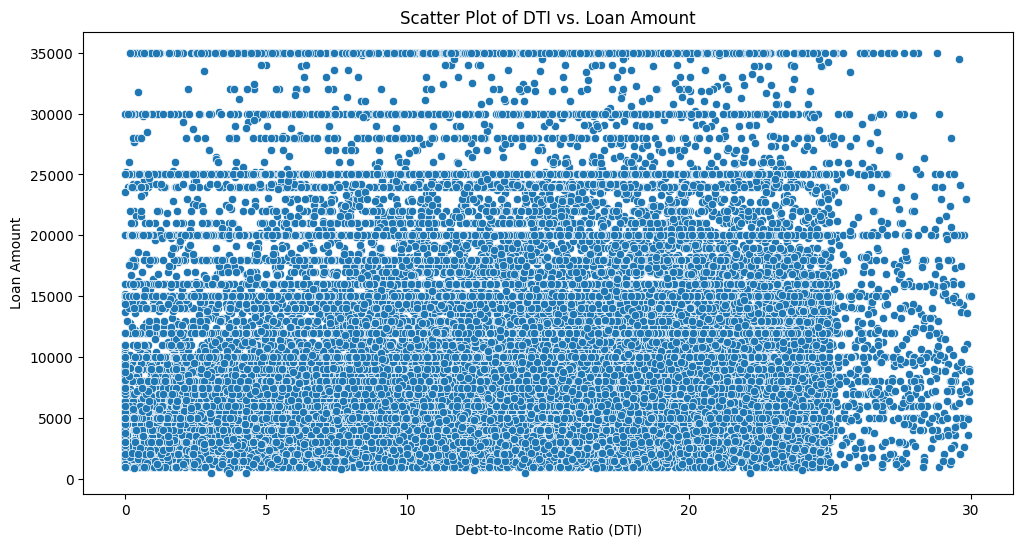

In [96]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=subset['dti'], y=subset['loan_amnt'])
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of DTI vs. Loan Amount')
plt.show()

In [97]:
correlation = subset['dti'].corr(subset['loan_amnt'])
print(f"Pearson correlation coefficient between DTI and Loan Amount: {correlation}")

Pearson correlation coefficient between DTI and Loan Amount: 0.0664393498946799


**Insights**
> The analysis suggests that there's a very less correlation between loan amount and debt to income ratio.


#### int_rate vs issue_d

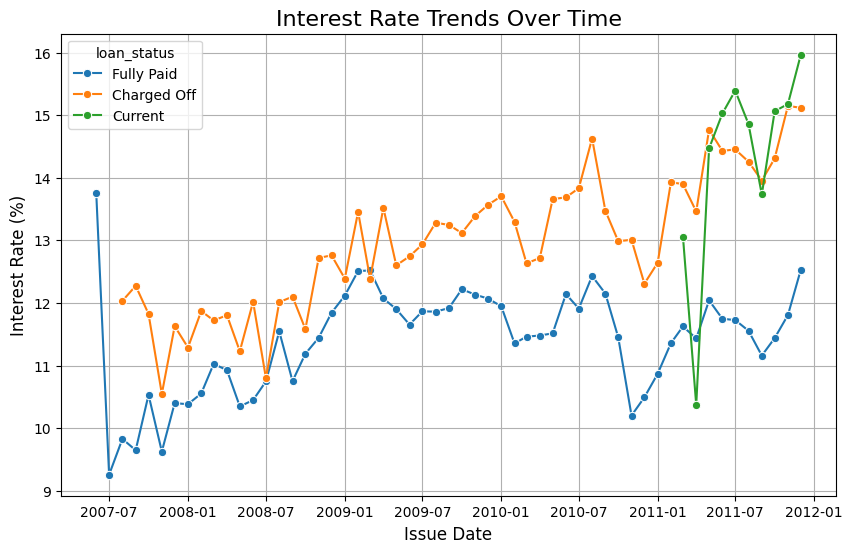

In [98]:
grouped = subset.groupby([subset['issue_d'].dt.to_period('M'), 'loan_status'])['int_rate'].mean().reset_index()
grouped['issue_d'] = grouped['issue_d'].dt.to_timestamp()

# Line plot of interest rate trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='issue_d', y='int_rate', hue='loan_status', marker='o', color='b')
plt.title('Interest Rate Trends Over Time', fontsize=16)
plt.xlabel('Issue Date', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.grid()
plt.show()

**Insights**
> The interest rate trends closely mirror the economic turbulence during and after the 2008 financial crisis.
The lender responded dynamically to changes in borrower risk profiles, economic conditions, and Federal Reserve policies.